In [1]:
import numpy as np
from typing import *

from layers import *
from utils import *
from optimizers import *
from network import *

In [2]:
def train_and_test(model: Model, x: np.ndarray, y: np.ndarray, epochs: int=10000, epochs_print: int=500, plot: bool=True) -> None:
    losses = model.train(x, y, epochs, epochs_print)
    
    pred_y = model.predict(x)
    pred_y_label = np.where(pred_y > 0.5, 1, 0)
    accuracy = np.mean(y == pred_y_label)

    for i, (y_i, pred_y_i) in enumerate(zip(y, pred_y_label)):
        print(f"Iter: {i} |\t Ground truth: {y_i} |\t Predict: {pred_y_i}")
    print(f"loss={losses[-1]:.5f} accuracy={accuracy*100:.2f}%", end="\n\n")

    if plot:
        show_loss(losses)
        show_result(x, y, pred_y_label)

def run(model: Model, hiddens: List[int]=[10, 10], 
        lr: float=0.1, optimizer: Optimizer=SGD, activation: Layer=Sigmoid,
        epochs: int=10000, epochs_print: int=500) -> None:
    
    np.random.seed(16) # Avoid generating different dataset

    print("Linear dataset: ", end="\n\n")
    x, y = generate_linear(n = 100)
    model_linear = model(input_size = 2, hidden_size = hiddens, output_size = 1,
                       lr=lr, optimizer=optimizer, layer=Affine, activation=activation)
    train_and_test(model_linear, x, y, epochs, epochs_print)

    print("XOR dataset:", end="\n\n")
    x, y = generate_XOR_easy()
    model_xor = model(input_size = 2, hidden_size = hiddens, output_size = 1,
                    lr=lr, optimizer=optimizer, layer=Affine, activation=activation)
    train_and_test(model_xor, x, y, epochs, epochs_print)

Show dataset

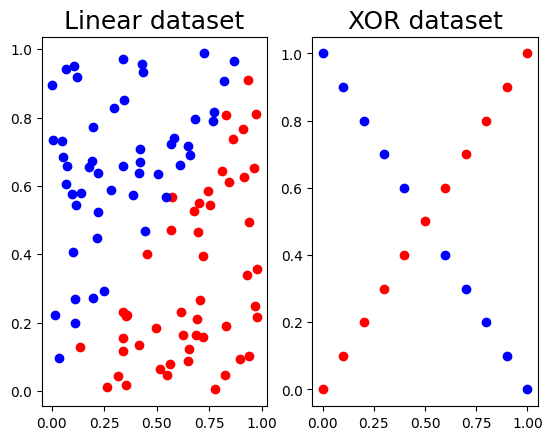

In [3]:
show_data()

## Base model

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.1
- optimizer = SGD
- activation function = Sigmoid
- epochs = 20000
    - 10000 epochs is not enough for XOR dataset

Results:
- Linear dataset: 100%
- XOR dataset: 100%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch  1000 loss : 0.07849912063132942
epoch  2000 loss : 0.04520821461964975
epoch  3000 loss : 0.03313976789135106
epoch  4000 loss : 0.026940282327582377
epoch  5000 loss : 0.0231676558935124
epoch  6000 loss : 0.020597469744500184
epoch  7000 loss : 0.018696248300644046
epoch  8000 loss : 0.0172013349710097
epoch  9000 loss : 0.01597140118800952
epoch 10000 loss : 0.014924860070591127
epoch 11000 loss : 0.014011814589522444
epoch 12000 loss : 0.013200238163389779
epoch 13000 loss : 0.01246870731690159
epoch 14000 loss : 0.011802361939324704
epoch 15000 loss : 0.011190551366477411
epoch 16000 loss : 0.010625407146434231
epoch 17000 loss : 0.010100948298129709
epoch 18000 loss : 0.009612504451975824
epoch 19000 loss : 0.009156335033611893
epoch 20000 loss : 0.008729372736693393
Iter: 0 |	 Ground truth: [1] |	 Predict: [1]
Iter: 1 |	 Ground truth: [0] |	

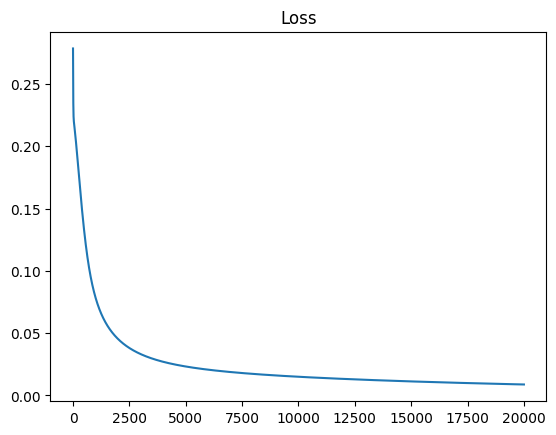

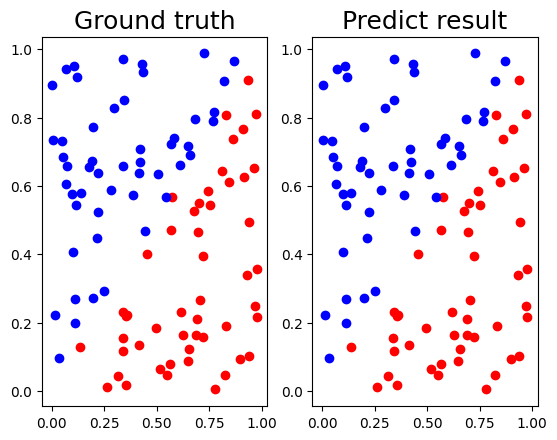

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch  1000 loss : 0.2507043488190884
epoch  2000 loss : 0.24827133390907646
epoch  3000 loss : 0.24530348812303807
epoch  4000 loss : 0.2402814733403033
epoch  5000 loss : 0.23052597643483982
epoch  6000 loss : 0.21082976053330493
epoch  7000 loss : 0.1749271050808638
epoch  8000 loss : 0.12385950082031297
epoch  9000 loss : 0.0832229156422266
epoch 10000 loss : 0.05890902645016745
epoch 11000 loss : 0.04323208060886581
epoch 12000 loss : 0.03235669038687363
epoch 13000 loss : 0.024545998062900892
epoch 14000 loss : 0.01887006239216881
epoch 15000 loss : 0.014738278931597995
epoch 16000 loss : 0.011720456712043657
epoch 17000 loss : 0.009496796793265413
epoch 18000 loss : 0.007836141129906608
epoch 19000 loss : 0.0065758111998092195
epoch 20000 loss : 0.005602855922810573
Iter: 0 |	 Ground truth: [0] |	 Predict: [0]
Iter: 1 |	 Ground truth: [1] |	 Predict: [

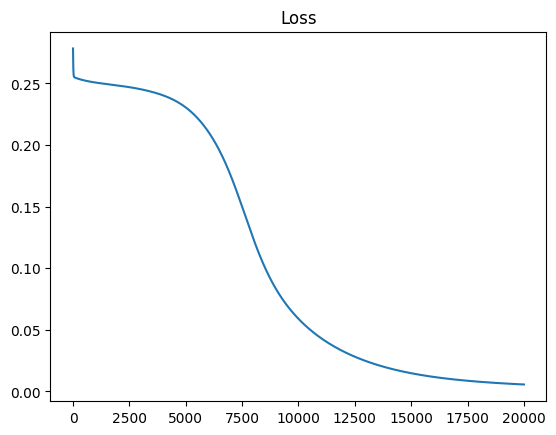

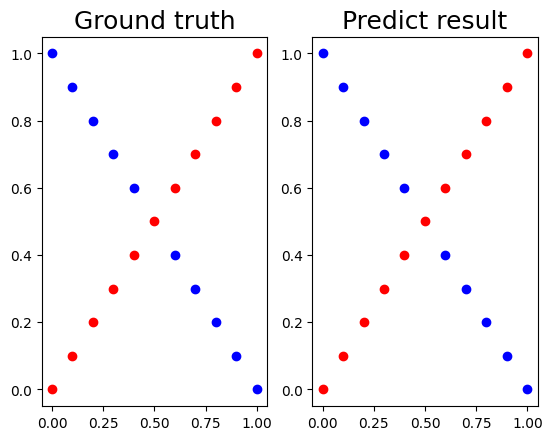

In [4]:
run(model=MLP, hiddens=[10, 10], lr=0.1, optimizer=SGD, activation=Sigmoid, epochs=20000, epochs_print=1000)

# Discussion

## Try different learning rates

### lr = 1.0

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 1
- optimizer = SGD
- activation function = Sigmoid
- epochs = 10000

Results:
- Linear dataset: 100%
- XOR dataset: 100%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.02317938949462297
epoch  1000 loss : 0.014926563410417138
epoch  1500 loss : 0.011191091289840282
epoch  2000 loss : 0.008729515682636408
epoch  2500 loss : 0.006954139674904294
epoch  3000 loss : 0.0056354696563658165
epoch  3500 loss : 0.004640196377194359
epoch  4000 loss : 0.0038785369718917577
epoch  4500 loss : 0.003287422507931429
epoch  5000 loss : 0.0028220555121013994
epoch  5500 loss : 0.0024504531717296084
epoch  6000 loss : 0.0021496428468460024
epoch  6500 loss : 0.0019029859260604337
epoch  7000 loss : 0.0016983067271663056
epoch  7500 loss : 0.0015265913770125992
epoch  8000 loss : 0.0013810842855138867
epoch  8500 loss : 0.0012566589950826796
epoch  9000 loss : 0.001149377437931681
epoch  9500 loss : 0.0010561785866941883
epoch 10000 loss : 0.0009746563279105581
Iter: 0 |	 Ground truth: [1] |	 Predict: [1]
Iter: 1 |	 

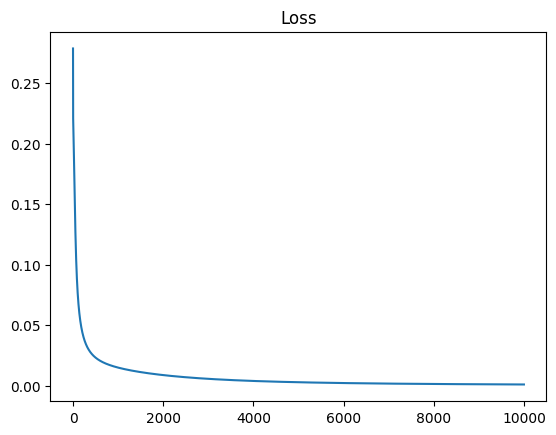

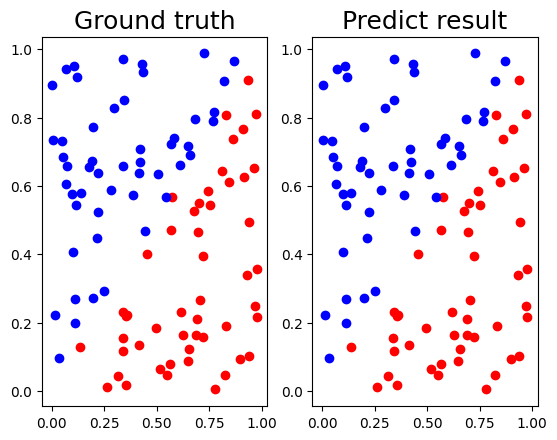

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.2309052570151074
epoch  1000 loss : 0.059508890504236
epoch  1500 loss : 0.014865852848488303
epoch  2000 loss : 0.005638123474035901
epoch  2500 loss : 0.0030077433327855094
epoch  3000 loss : 0.0019380428079908809
epoch  3500 loss : 0.0013914341322601536
epoch  4000 loss : 0.001069137532734546
epoch  4500 loss : 0.0008600692561511968
epoch  5000 loss : 0.0007149886846254746
epoch  5500 loss : 0.0006091605899622459
epoch  6000 loss : 0.0005289522672087317
epoch  6500 loss : 0.0004662953051716207
epoch  7000 loss : 0.00041613773331490496
epoch  7500 loss : 0.0003751686752567317
epoch  8000 loss : 0.0003411350422191383
epoch  8500 loss : 0.0003124543672636193
epoch  9000 loss : 0.00028798492186482794
epoch  9500 loss : 0.00026688368684869184
epoch 10000 loss : 0.00024851555363094696
Iter: 0 |	 Ground truth: [0] |	 Predict: [0]
Iter: 1 |	 G

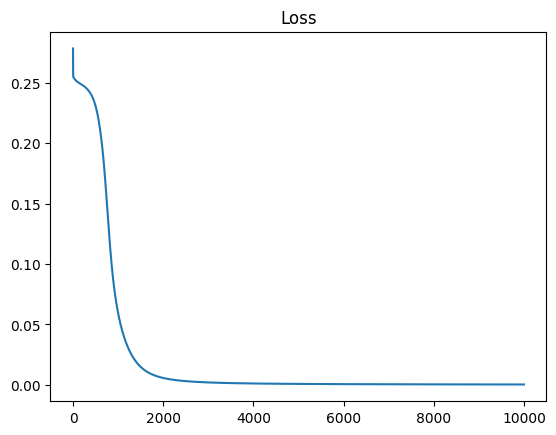

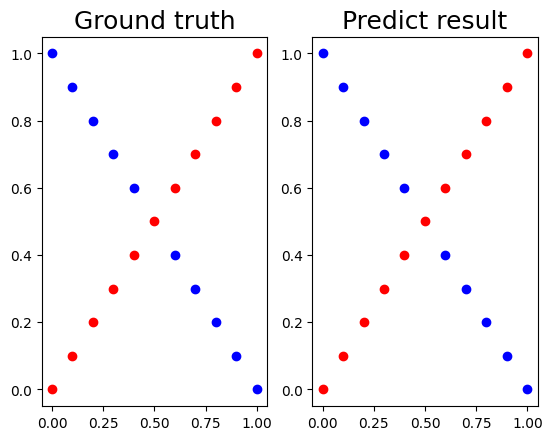

In [5]:
run(model=MLP, hiddens=[10, 10], lr=1, optimizer=SGD, activation=Sigmoid, epochs=10000, epochs_print=500)

### lr = 0.5

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.5
- optimizer = SGD
- activation function = Sigmoid
- epochs = 10000

Results:
- Linear dataset: 100%
- XOR dataset: 100%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.03805973957099493
epoch  1000 loss : 0.023172667307461467
epoch  1500 loss : 0.017910279906818517
epoch  2000 loss : 0.01492555134655057
epoch  2500 loss : 0.012825878438134241
epoch  3000 loss : 0.011190748636974383
epoch  3500 loss : 0.009852574496155708
epoch  4000 loss : 0.008729404175920828
epoch  4500 loss : 0.007773768828849241
epoch  5000 loss : 0.006954144387248918
epoch  5500 loss : 0.006247418535669049
epoch  6000 loss : 0.005635536027994194
epoch  6500 loss : 0.005103861663613637
epoch  7000 loss : 0.004640292782374203
epoch  7500 loss : 0.004234717633524566
epoch  8000 loss : 0.0038786447065177433
epoch  8500 loss : 0.003564924961509941
epoch  9000 loss : 0.0032875309454882206
epoch  9500 loss : 0.003041375262085988
epoch 10000 loss : 0.0028221590428416667
Iter: 0 |	 Ground truth: [1] |	 Predict: [1]
Iter: 1 |	 Ground tru

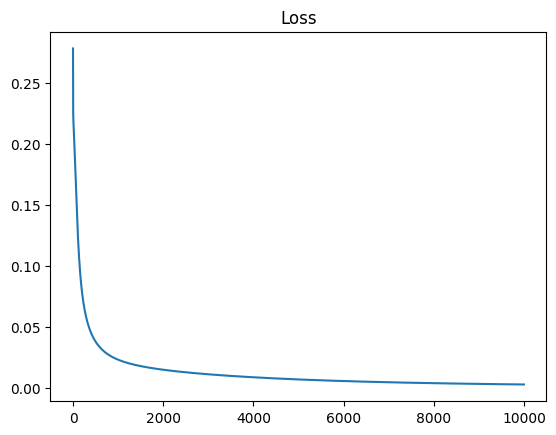

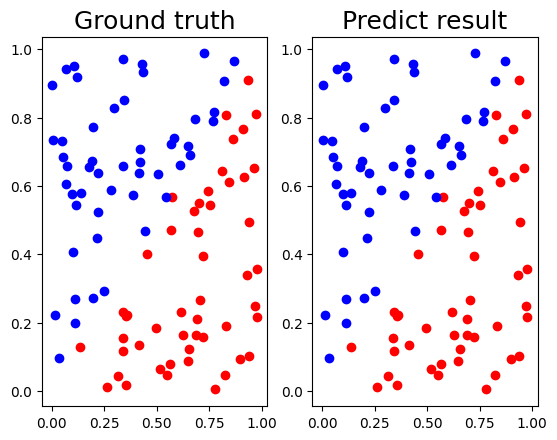

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.24698196595925584
epoch  1000 loss : 0.23069080907268238
epoch  1500 loss : 0.1506997768206884
epoch  2000 loss : 0.05916748780888314
epoch  2500 loss : 0.028248498811621954
epoch  3000 loss : 0.014793109809892301
epoch  3500 loss : 0.008635369187159306
epoch  4000 loss : 0.0056179732826822665
epoch  4500 loss : 0.003979257715463319
epoch  5000 loss : 0.00300003378256862
epoch  5500 loss : 0.0023678748708637846
epoch  6000 loss : 0.0019342765086906141
epoch  6500 loss : 0.00162235708940408
epoch  7000 loss : 0.0013892875329479238
epoch  7500 loss : 0.0012097007425433215
epoch  8000 loss : 0.0010677841946486752
epoch  8500 loss : 0.0009532493325498804
epoch  9000 loss : 0.0008591544395725712
epoch  9500 loss : 0.0007806684830606204
epoch 10000 loss : 0.000714338311927587
Iter: 0 |	 Ground truth: [0] |	 Predict: [0]
Iter: 1 |	 Ground truth:

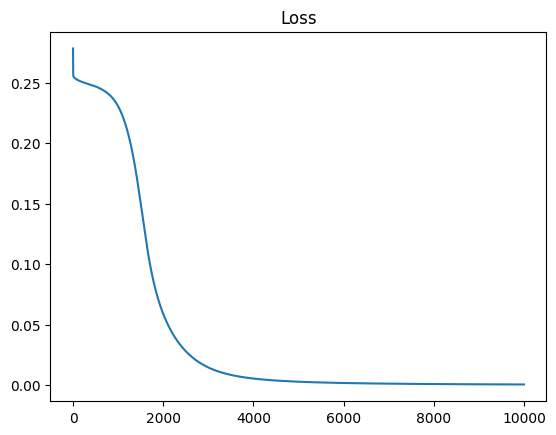

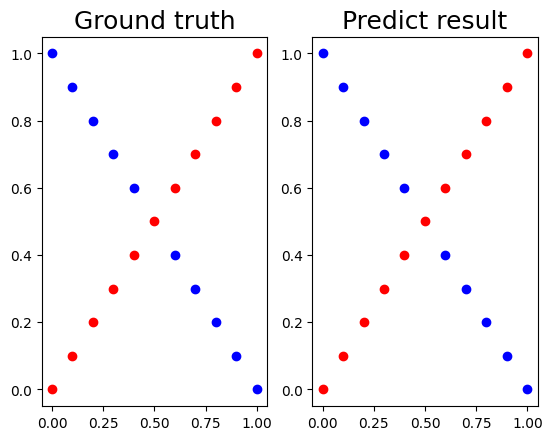

In [6]:
run(model=MLP, hiddens=[10, 10], lr=0.5, optimizer=SGD, activation=Sigmoid, epochs=10000, epochs_print=500)

### lr = 0.1, epochs = 10000

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.1
- optimizer = SGD
- activation function = Sigmoid
- epochs = 10000

Results:
- Linear dataset: 100%
- XOR dataset: 95.24%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.1313612668945537
epoch  1000 loss : 0.07849912063132942
epoch  1500 loss : 0.05675375661291609
epoch  2000 loss : 0.04520821461964975
epoch  2500 loss : 0.03802743611438809
epoch  3000 loss : 0.03313976789135106
epoch  3500 loss : 0.029608155623949754
epoch  4000 loss : 0.026940282327582377
epoch  4500 loss : 0.024851819834339598
epoch  5000 loss : 0.0231676558935124
epoch  5500 loss : 0.02177476064516792
epoch  6000 loss : 0.020597469744500184
epoch  6500 loss : 0.01958360178006329
epoch  7000 loss : 0.018696248300644046
epoch  7500 loss : 0.01790872020035469
epoch  8000 loss : 0.0172013349710097
epoch  8500 loss : 0.01655931832205347
epoch  9000 loss : 0.01597140118800952
epoch  9500 loss : 0.015428861940472003
epoch 10000 loss : 0.014924860070591127
Iter: 0 |	 Ground truth: [1] |	 Predict: [1]
Iter: 1 |	 Ground truth: [0] |	 Predic

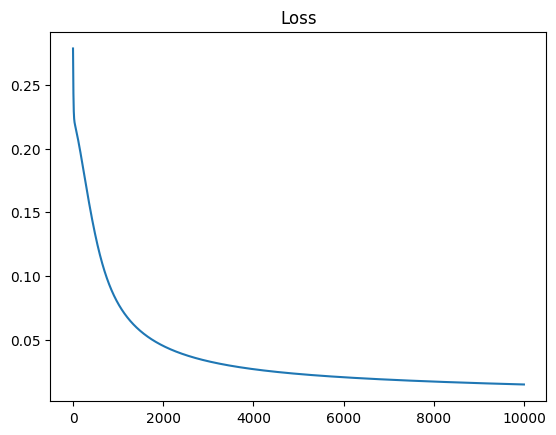

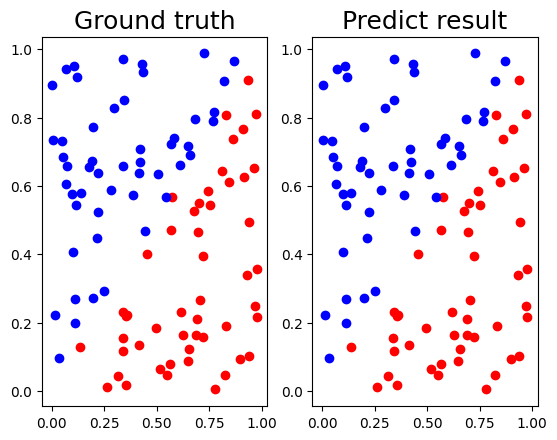

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.25242578806925176
epoch  1000 loss : 0.2507043488190884
epoch  1500 loss : 0.24944108867740902
epoch  2000 loss : 0.24827133390907646
epoch  2500 loss : 0.24695820302855237
epoch  3000 loss : 0.24530348812303807
epoch  3500 loss : 0.24314618511553915
epoch  4000 loss : 0.2402814733403033
epoch  4500 loss : 0.23628529567313544
epoch  5000 loss : 0.23052597643483982
epoch  5500 loss : 0.22227907896126928
epoch  6000 loss : 0.21082976053330493
epoch  6500 loss : 0.19535405373310016
epoch  7000 loss : 0.1749271050808638
epoch  7500 loss : 0.14995846765648516
epoch  8000 loss : 0.12385950082031297
epoch  8500 loss : 0.10105935539214136
epoch  9000 loss : 0.0832229156422266
epoch  9500 loss : 0.06958379535265553
epoch 10000 loss : 0.05890902645016745
Iter: 0 |	 Ground truth: [0] |	 Predict: [0]
Iter: 1 |	 Ground truth: [1] |	 Predict: [1]
Iter:

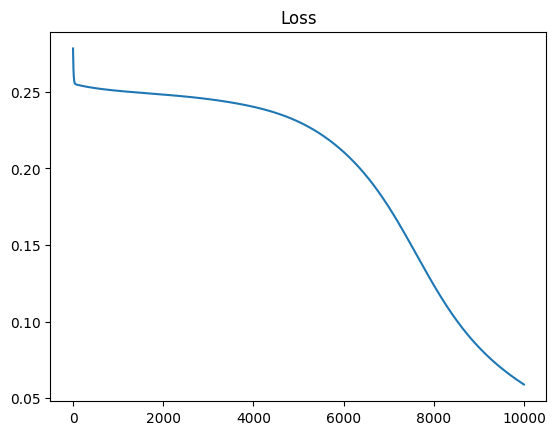

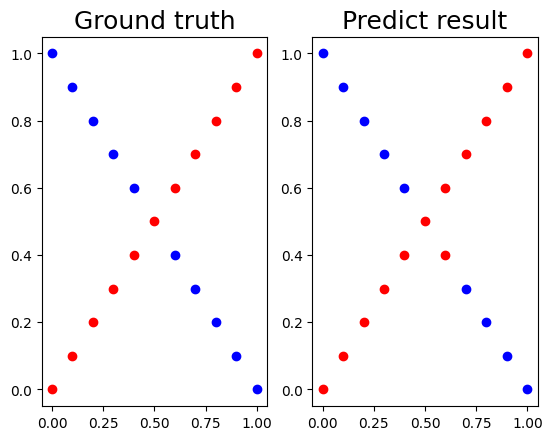

In [7]:
run(model=MLP, hiddens=[10, 10], lr=0.1, optimizer=SGD, activation=Sigmoid, epochs=10000, epochs_print=500)

### lr = 0.05, epochs = 10000

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.05
- optimizer = SGD
- activation function = Sigmoid
- epochs = 10000

Results:
- Linear dataset: 98%
- XOR dataset: 71.43%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.17930501915903033
epoch  1000 loss : 0.1312614522436886
epoch  1500 loss : 0.09846457659381755
epoch  2000 loss : 0.07846677570176339
epoch  2500 loss : 0.06562974340803661
epoch  3000 loss : 0.05674055452704954
epoch  3500 loss : 0.05020976621345244
epoch  4000 loss : 0.04520142494270659
epoch  4500 loss : 0.04123742840062881
epoch  5000 loss : 0.03802347837776367
epoch  5500 loss : 0.035367311802207174
epoch  6000 loss : 0.033137277158727406
epoch  6500 loss : 0.031239826042235
epoch  7000 loss : 0.02960650107797425
epoch  7500 loss : 0.028186003432357845
epoch  8000 loss : 0.026939136084380526
epoch  8500 loss : 0.025835457659663538
epoch  9000 loss : 0.02485099772394904
epoch  9500 loss : 0.023966654966708467
epoch 10000 loss : 0.023167048539316205
Iter: 0 |	 Ground truth: [1] |	 Predict: [1]
Iter: 1 |	 Ground truth: [0] |	 Predic

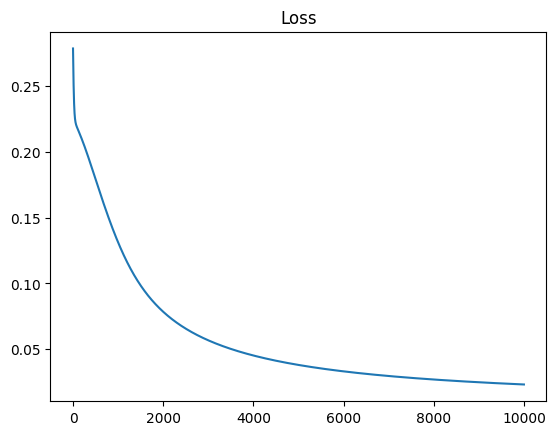

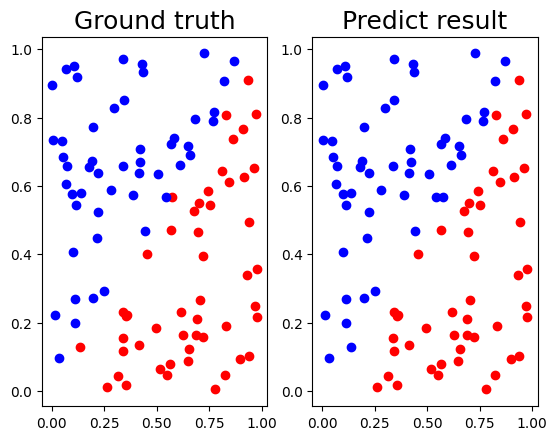

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.2536659490956469
epoch  1000 loss : 0.2524239251836895
epoch  1500 loss : 0.2514729842365363
epoch  2000 loss : 0.2507029989875783
epoch  2500 loss : 0.25004186019312435
epoch  3000 loss : 0.249439635851765
epoch  3500 loss : 0.24885900044449438
epoch  4000 loss : 0.24826936835756858
epoch  4500 loss : 0.24764339121006942
epoch  5000 loss : 0.24695530247662129
epoch  5500 loss : 0.24618099066136725
epoch  6000 loss : 0.24529924039139997
epoch  6500 loss : 0.24429197231131652
epoch  7000 loss : 0.24314018431868278
epoch  7500 loss : 0.2418154429382731
epoch  8000 loss : 0.24027275004856238
epoch  8500 loss : 0.238450020414605
epoch  9000 loss : 0.23627201361319092
epoch  9500 loss : 0.23365414718149172
epoch 10000 loss : 0.2305056951386921
Iter: 0 |	 Ground truth: [0] |	 Predict: [0]
Iter: 1 |	 Ground truth: [1] |	 Predict: [1]
Iter: 2 |	 

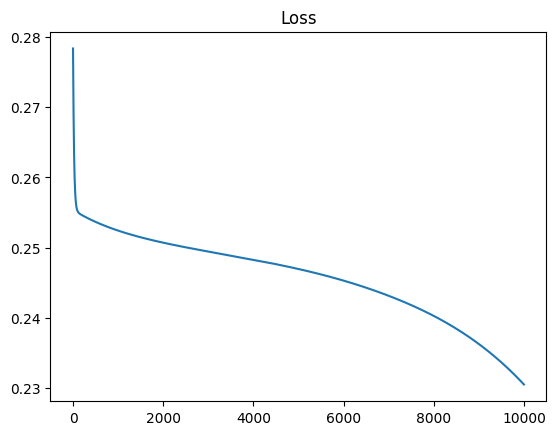

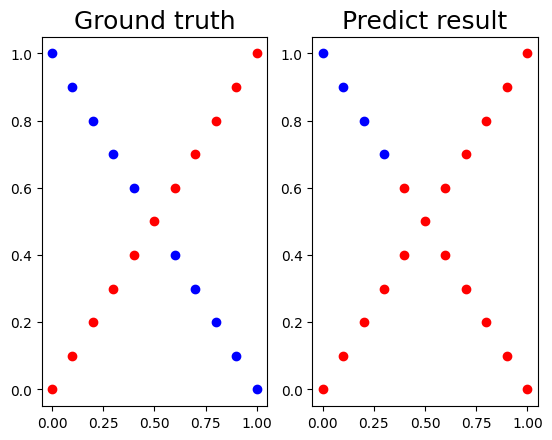

In [8]:
run(model=MLP, hiddens=[10, 10], lr=0.05, optimizer=SGD, activation=Sigmoid, epochs=10000, epochs_print=500)

### lr = 0.05, epochs = 50000

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.05
- optimizer = SGD
- activation function = Sigmoid
- epochs = 50000

Results:
- Linear dataset: 100%
- XOR dataset: 100%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch  1000 loss : 0.1312614522436886
epoch  2000 loss : 0.07846677570176339
epoch  3000 loss : 0.05674055452704954
epoch  4000 loss : 0.04520142494270659
epoch  5000 loss : 0.03802347837776367
epoch  6000 loss : 0.033137277158727406
epoch  7000 loss : 0.02960650107797425
epoch  8000 loss : 0.026939136084380526
epoch  9000 loss : 0.02485099772394904
epoch 10000 loss : 0.023167048539316205
epoch 11000 loss : 0.02177430024014501
epoch 12000 loss : 0.020597112756275536
epoch 13000 loss : 0.019583319417221797
epoch 14000 loss : 0.018696021018684485
epoch 15000 loss : 0.01790853441980174
epoch 16000 loss : 0.017201181056750527
epoch 17000 loss : 0.016559189305962178
epoch 18000 loss : 0.015971291942166475
epoch 19000 loss : 0.015428768630416924
epoch 20000 loss : 0.01492477978655573
epoch 21000 loss : 0.014453895050247922
epoch 22000 loss : 0.01401175413685783

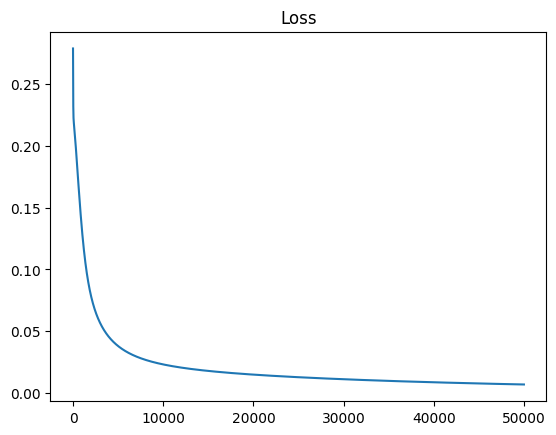

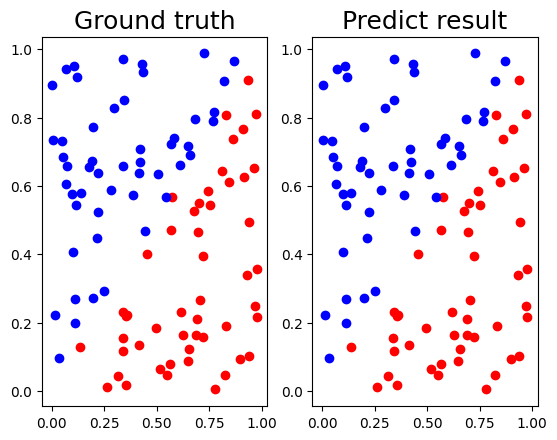

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch  1000 loss : 0.2524239251836895
epoch  2000 loss : 0.2507029989875783
epoch  3000 loss : 0.249439635851765
epoch  4000 loss : 0.24826936835756858
epoch  5000 loss : 0.24695530247662129
epoch  6000 loss : 0.24529924039139997
epoch  7000 loss : 0.24314018431868278
epoch  8000 loss : 0.24027275004856238
epoch  9000 loss : 0.23627201361319092
epoch 10000 loss : 0.2305056951386921
epoch 11000 loss : 0.22224911942850864
epoch 12000 loss : 0.21078734266231405
epoch 13000 loss : 0.19529533872945604
epoch 14000 loss : 0.17484919424903764
epoch 15000 loss : 0.14986744177845637
epoch 16000 loss : 0.12377265698282505
epoch 17000 loss : 0.10098955579353622
epoch 18000 loss : 0.08317042075592253
epoch 19000 loss : 0.06954384249168732
epoch 20000 loss : 0.0588774674733005
epoch 21000 loss : 0.05028193900567889
epoch 22000 loss : 0.04321062938500908
epoch 23000 loss : 

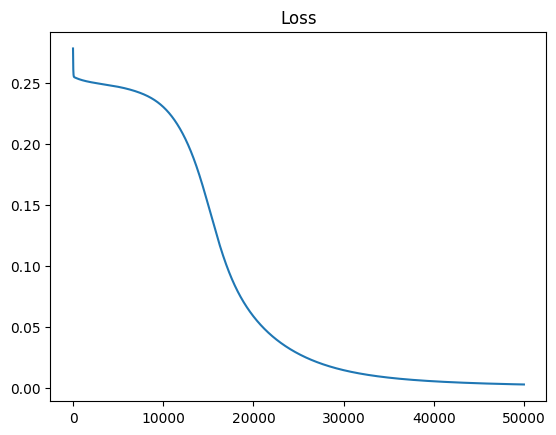

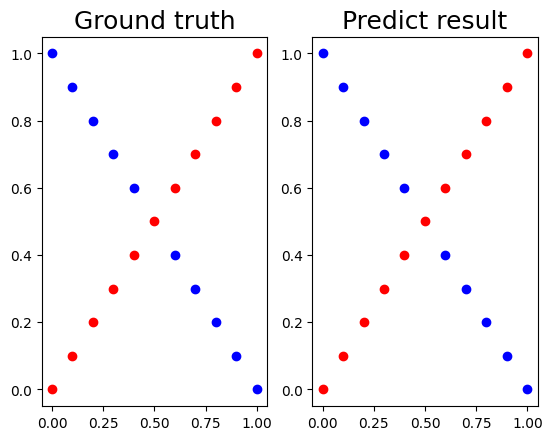

In [9]:
run(model=MLP, hiddens=[10, 10], lr=0.05, optimizer=SGD, activation=Sigmoid, epochs=50000, epochs_print=1000)

### lr = 0.01, epochs = 20000 (not works)

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.01
- optimizer = SGD
- activation function = Sigmoid
- epochs = 20000

Results:
- Linear dataset: 98%
- XOR dataset: 52.38%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.2176923800123899
epoch  1000 loss : 0.20925634472938515
epoch  1500 loss : 0.19984745411988034
epoch  2000 loss : 0.18969353145623127
epoch  2500 loss : 0.1792046333570898
epoch  3000 loss : 0.16875099270333505
epoch  3500 loss : 0.15858635383302144
epoch  4000 loss : 0.14887052972519696
epoch  4500 loss : 0.139711069003295
epoch  5000 loss : 0.13118185206663213
epoch  5500 loss : 0.12332459986292355
epoch  6000 loss : 0.11614843924898555
epoch  6500 loss : 0.10963404131403102
epoch  7000 loss : 0.10374149328146322
epoch  7500 loss : 0.0984189286018859
epoch  8000 loss : 0.09360976120452172
epoch  8500 loss : 0.08925775035830304
epoch  9000 loss : 0.08531003611092391
epoch  9500 loss : 0.08171864510315073
epoch 10000 loss : 0.07844099076816279
epoch 10500 loss : 0.07543978265261965
epoch 11000 loss : 0.07268262938394134
epoch 11500 lo

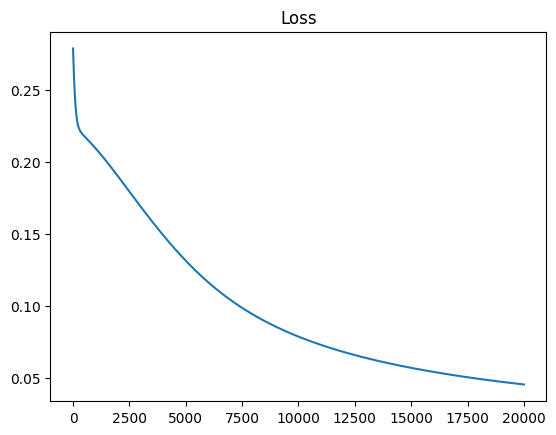

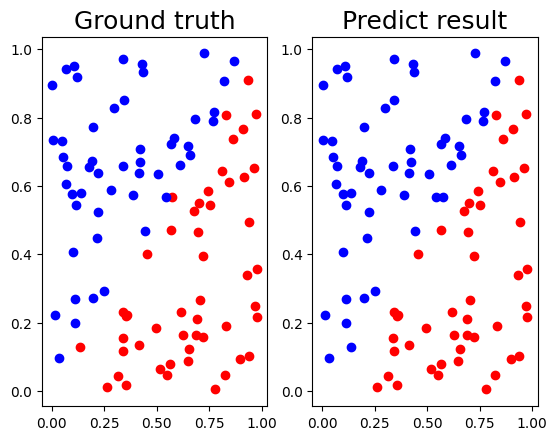

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.2552268109496871
epoch  1000 loss : 0.2546195483789962
epoch  1500 loss : 0.25427796020125326
epoch  2000 loss : 0.253960871879229
epoch  2500 loss : 0.2536638863604602
epoch  3000 loss : 0.2533851756437329
epoch  3500 loss : 0.2531230991422249
epoch  4000 loss : 0.2528761666156706
epoch  4500 loss : 0.2526430232614537
epoch  5000 loss : 0.25242243617864135
epoch  5500 loss : 0.2522132821667678
epoch  6000 loss : 0.2520145367436574
epoch  6500 loss : 0.2518252642562684
epoch  7000 loss : 0.2516446089720279
epoch  7500 loss : 0.25147178705104134
epoch  8000 loss : 0.2513060793102994
epoch  8500 loss : 0.25114682470008726
epoch  9000 loss : 0.2509934144206825
epoch  9500 loss : 0.2508452866144203
epoch 10000 loss : 0.25070192157450777
epoch 10500 loss : 0.2505628374176937
epoch 11000 loss : 0.25042758617315075
epoch 11500 loss : 0.250295750

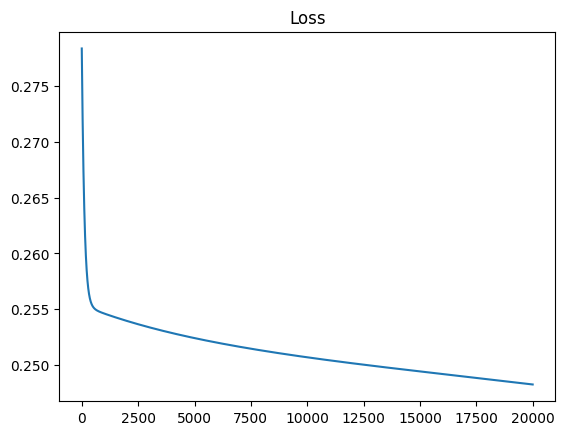

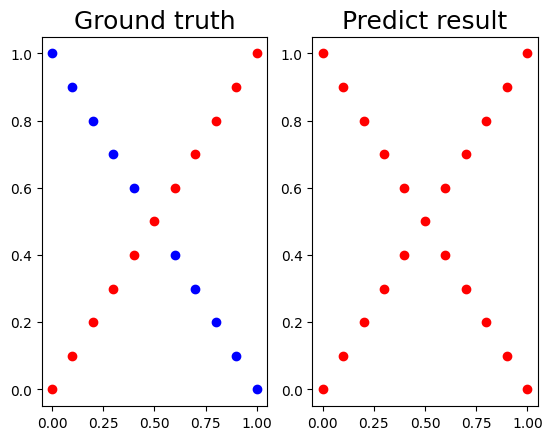

In [10]:
run(model=MLP, hiddens=[10, 10], lr=0.01, optimizer=SGD, activation=Sigmoid, epochs=20000, epochs_print=500)

### lr = 0.01, epochs = 50000 (not works)

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.01
- optimizer = SGD
- activation function = Sigmoid
- epochs = 50000

Results:
- Linear dataset: 98%
- XOR dataset: 71.43%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch  1000 loss : 0.20925634472938515
epoch  2000 loss : 0.18969353145623127
epoch  3000 loss : 0.16875099270333505
epoch  4000 loss : 0.14887052972519696
epoch  5000 loss : 0.13118185206663213
epoch  6000 loss : 0.11614843924898555
epoch  7000 loss : 0.10374149328146322
epoch  8000 loss : 0.09360976120452172
epoch  9000 loss : 0.08531003611092391
epoch 10000 loss : 0.07844099076816279
epoch 11000 loss : 0.07268262938394134
epoch 12000 loss : 0.06779223414785795
epoch 13000 loss : 0.06358839052826862
epoch 14000 loss : 0.05993523530974478
epoch 15000 loss : 0.056730028571876805
epoch 16000 loss : 0.05389406732844912
epoch 17000 loss : 0.051366215216257984
epoch 18000 loss : 0.04909831794215409
epoch 19000 loss : 0.04705193883789848
epoch 20000 loss : 0.04519601220251254
epoch 21000 loss : 0.043505136933219155
epoch 22000 loss : 0.0419583205527382
epoch 2

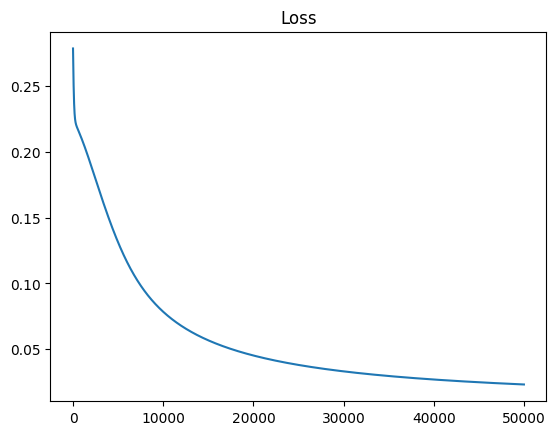

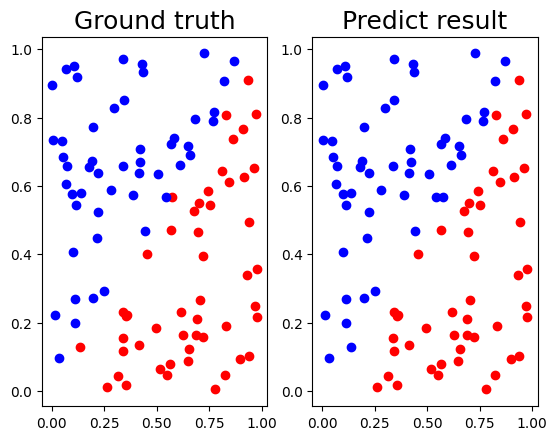

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch  1000 loss : 0.2546195483789962
epoch  2000 loss : 0.253960871879229
epoch  3000 loss : 0.2533851756437329
epoch  4000 loss : 0.2528761666156706
epoch  5000 loss : 0.25242243617864135
epoch  6000 loss : 0.2520145367436574
epoch  7000 loss : 0.2516446089720279
epoch  8000 loss : 0.2513060793102994
epoch  9000 loss : 0.2509934144206825
epoch 10000 loss : 0.25070192157450777
epoch 11000 loss : 0.25042758617315075
epoch 12000 loss : 0.25016693920813227
epoch 13000 loss : 0.24991694882924972
epoch 14000 loss : 0.24967493132945048
epoch 15000 loss : 0.24943847781873588
epoch 16000 loss : 0.249205393678026
epoch 17000 loss : 0.24897364858532042
epoch 18000 loss : 0.24874133551463493
epoch 19000 loss : 0.24850663764075165
epoch 20000 loss : 0.2482678025471968
epoch 21000 loss : 0.24802312352267736
epoch 22000 loss : 0.24777092801191514
epoch 23000 loss : 0.2475

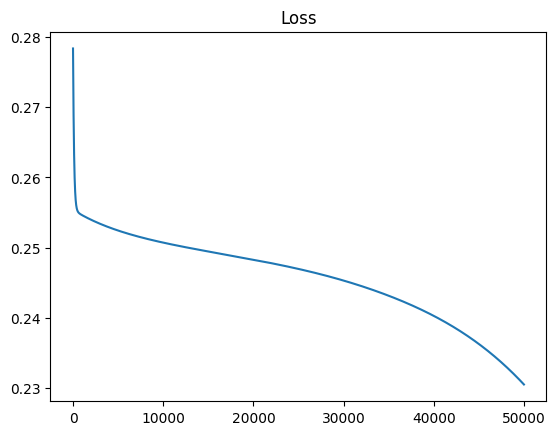

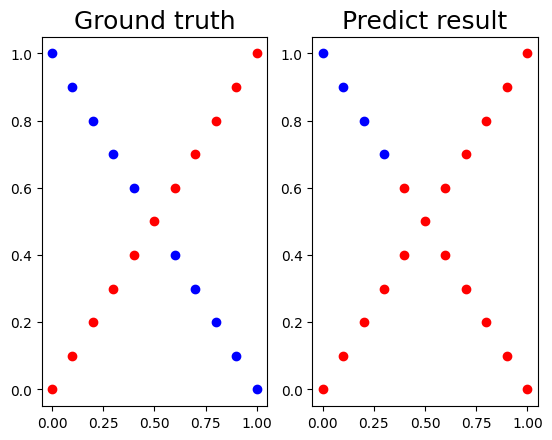

In [11]:
run(model=MLP, hiddens=[10, 10], lr=0.01, optimizer=SGD, activation=Sigmoid, epochs=50000, epochs_print=1000)

## Try different numbers of hidden units

### hiddens = [20, 20], epochs = 20000

Parameters: 
- hidden layer size = [20, 20]
- learning rate = 0.1
- optimizer = SGD
- activation function = Sigmoid
- epochs = 20000

Results:
- Linear dataset: 100%
- XOR dataset: 100%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.08646261369380459
epoch  1000 loss : 0.05729792408657759
epoch  1500 loss : 0.04454976538699686
epoch  2000 loss : 0.037146407174474705
epoch  2500 loss : 0.03226722332106251
epoch  3000 loss : 0.0287975962267326
epoch  3500 loss : 0.026195627954133927
epoch  4000 loss : 0.024163279375076212
epoch  4500 loss : 0.022522886976465137
epoch  5000 loss : 0.02116235893982739
epoch  5500 loss : 0.020007889233130027
epoch  6000 loss : 0.019009203310660135
epoch  6500 loss : 0.01813107601457335
epoch  7000 loss : 0.017348221247512504
epoch  7500 loss : 0.016642096604796056
epoch  8000 loss : 0.015998843515975116
epoch  8500 loss : 0.015407924524656629
epoch  9000 loss : 0.014861201116411338
epoch  9500 loss : 0.014352296919705963
epoch 10000 loss : 0.013876149828666582
epoch 10500 loss : 0.013428691664327912
epoch 11000 loss : 0.01300661548611

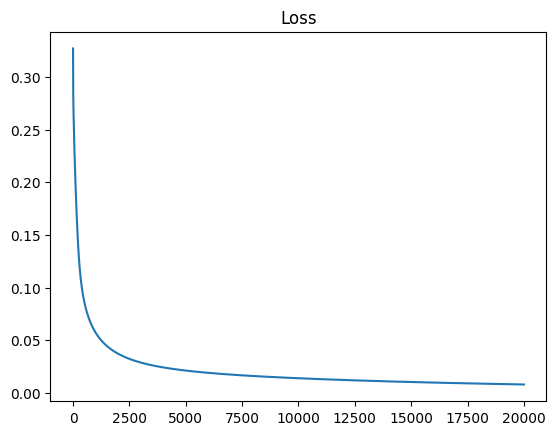

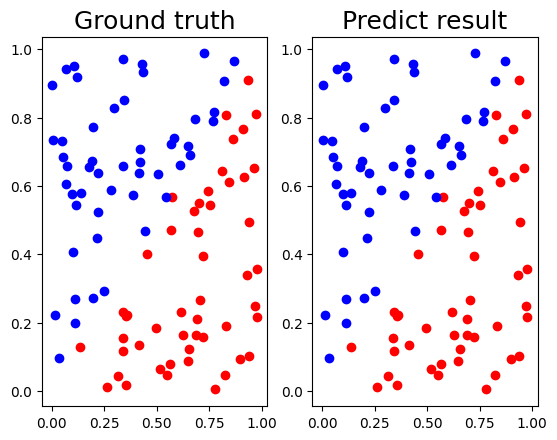

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.23309239351224492
epoch  1000 loss : 0.21149345616146029
epoch  1500 loss : 0.18567247840432796
epoch  2000 loss : 0.15440772405102196
epoch  2500 loss : 0.12429470416104486
epoch  3000 loss : 0.10031642239543408
epoch  3500 loss : 0.08250720738939
epoch  4000 loss : 0.06927590066462815
epoch  4500 loss : 0.05917576710314741
epoch  5000 loss : 0.05116624935519566
epoch  5500 loss : 0.04456485064798445
epoch  6000 loss : 0.03895279406318267
epoch  6500 loss : 0.034084297468936244
epoch  7000 loss : 0.029819028088045634
epoch  7500 loss : 0.026075797870936807
epoch  8000 loss : 0.022802073253769716
epoch  8500 loss : 0.01995582709868459
epoch  9000 loss : 0.017496701121633
epoch  9500 loss : 0.015383298356036346
epoch 10000 loss : 0.013573717740604771
epoch 10500 loss : 0.012027221790716362
epoch 11000 loss : 0.010705835702751496
epoch 1150

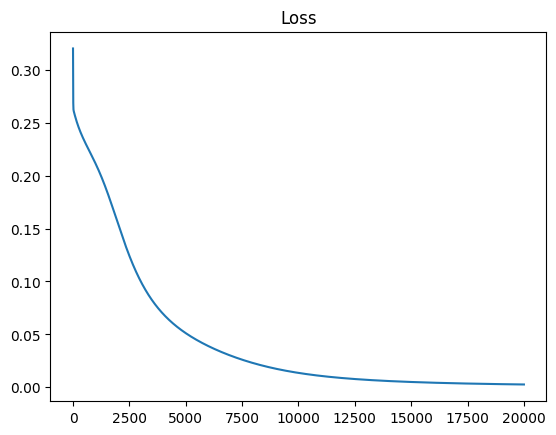

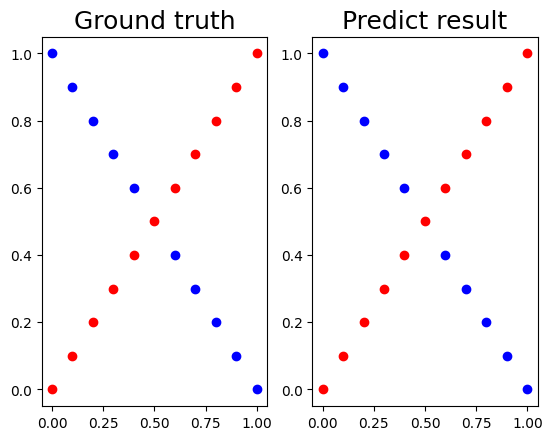

In [12]:
run(model=MLP, hiddens=[20, 20], lr=0.1, optimizer=SGD, activation=Sigmoid, epochs=20000, epochs_print=500)


### hiddens = [5, 5], epochs = 20000

Parameters: 
- hidden layer size = [5, 5]
- learning rate = 0.1
- optimizer = SGD
- activation function = Sigmoid
- epochs = 20000

Results:
- Linear dataset: 100%
- XOR dataset: 85.71%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.2337614430936538
epoch  1000 loss : 0.20409038440945415
epoch  1500 loss : 0.14990003725377654
epoch  2000 loss : 0.09894140730808897
epoch  2500 loss : 0.06896334857818019
epoch  3000 loss : 0.05272747867372589
epoch  3500 loss : 0.04315247779381988
epoch  4000 loss : 0.036935709119942144
epoch  4500 loss : 0.032596939094398286
epoch  5000 loss : 0.029401543111033265
epoch  5500 loss : 0.026946890539534755
epoch  6000 loss : 0.024995334046281504
epoch  6500 loss : 0.023398641459208194
epoch  7000 loss : 0.02206028572651898
epoch  7500 loss : 0.020915169419462892
epoch  8000 loss : 0.019918079878772713
epoch  8500 loss : 0.01903680976542577
epoch  9000 loss : 0.018247902171286537
epoch  9500 loss : 0.017533935052676728
epoch 10000 loss : 0.016881740345072935
epoch 10500 loss : 0.016281207653119273
epoch 11000 loss : 0.0157244631064191

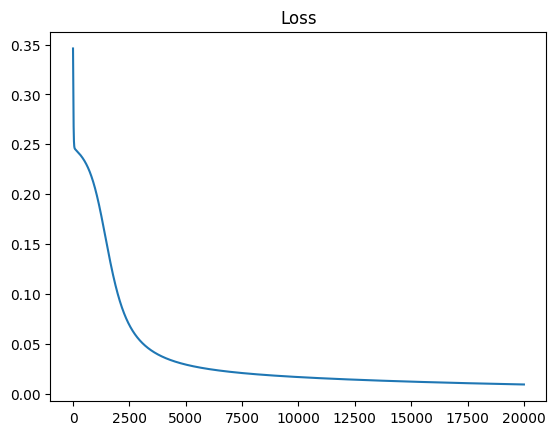

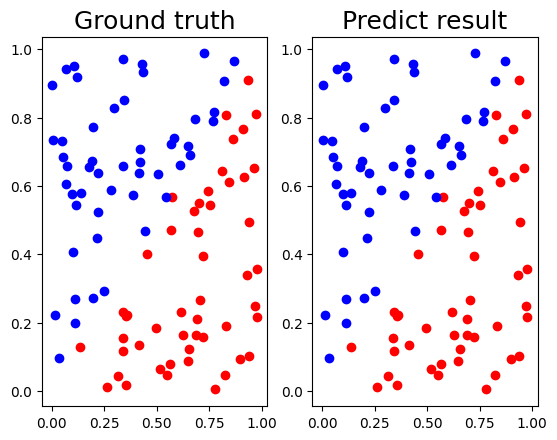

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.25021727175018155
epoch  1000 loss : 0.250077101171905
epoch  1500 loss : 0.24995881773856268
epoch  2000 loss : 0.24985731168285732
epoch  2500 loss : 0.24976862701477437
epoch  3000 loss : 0.24968962365623676
epoch  3500 loss : 0.2496177400008673
epoch  4000 loss : 0.24955081950279207
epoch  4500 loss : 0.24948697825646501
epoch  5000 loss : 0.24942449818758416
epoch  5500 loss : 0.2493617348354888
epoch  6000 loss : 0.24929703102882114
epoch  6500 loss : 0.24922862867793374
epoch  7000 loss : 0.24915457070194313
epoch  7500 loss : 0.2490725837937241
epoch  8000 loss : 0.248979930096809
epoch  8500 loss : 0.24887321146448663
epoch  9000 loss : 0.2487481029918864
epoch  9500 loss : 0.24859898165875557
epoch 10000 loss : 0.24841839917057768
epoch 10500 loss : 0.24819632240663506
epoch 11000 loss : 0.24791902603880794
epoch 11500 loss : 0.

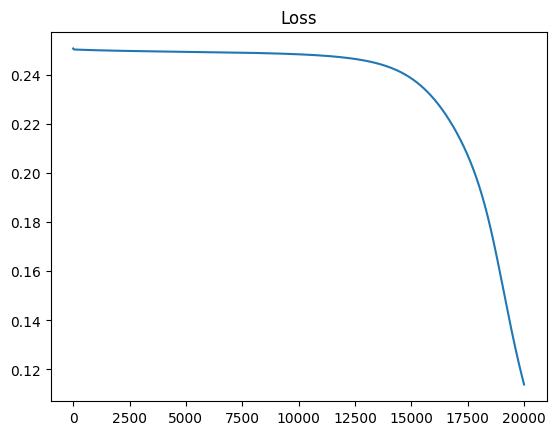

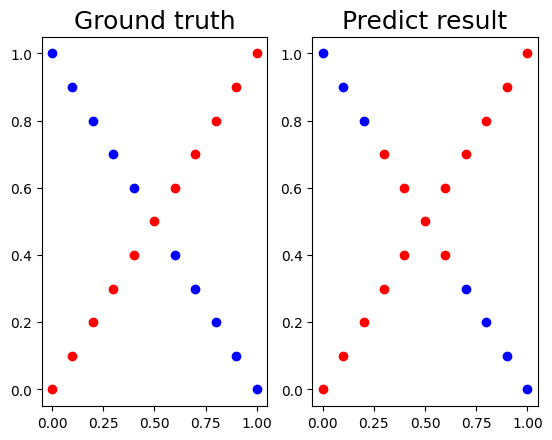

In [13]:
run(model=MLP, hiddens=[5, 5], lr=0.1, optimizer=SGD, activation=Sigmoid, epochs=20000, epochs_print=500)

### hiddens = [5, 5], epochs = 50000

Parameters: 
- hidden layer size = [5, 5]
- learning rate = 0.1
- optimizer = SGD
- activation function = Sigmoid
- epochs = 50000

Results:
- Linear dataset: 100%
- XOR dataset: 100%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch  1000 loss : 0.20409038440945415
epoch  2000 loss : 0.09894140730808897
epoch  3000 loss : 0.05272747867372589
epoch  4000 loss : 0.036935709119942144
epoch  5000 loss : 0.029401543111033265
epoch  6000 loss : 0.024995334046281504
epoch  7000 loss : 0.02206028572651898
epoch  8000 loss : 0.019918079878772713
epoch  9000 loss : 0.018247902171286537
epoch 10000 loss : 0.016881740345072935
epoch 11000 loss : 0.015724463106419163
epoch 12000 loss : 0.014718742100606008
epoch 13000 loss : 0.013828204401951552
epoch 14000 loss : 0.01302872500502724
epoch 15000 loss : 0.01230364567985756
epoch 16000 loss : 0.011641018493784445
epoch 17000 loss : 0.01103195591885176
epoch 18000 loss : 0.01046961575515033
epoch 19000 loss : 0.009948563732917796
epoch 20000 loss : 0.009464366184007245
epoch 21000 loss : 0.009013324707286045
epoch 22000 loss : 0.00859229911284

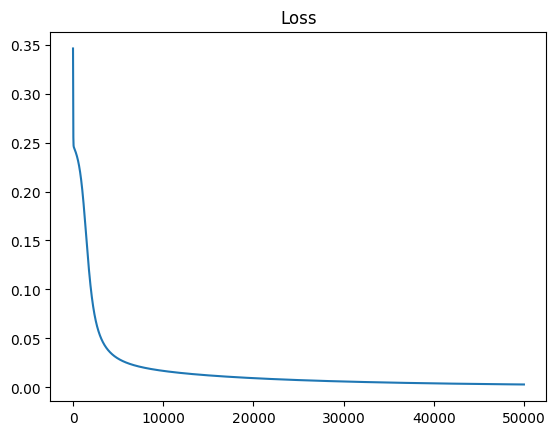

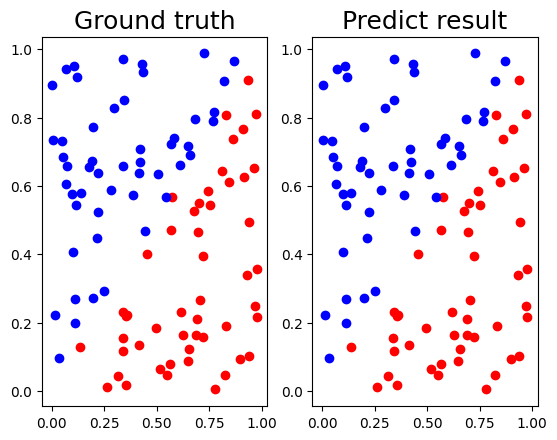

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch  1000 loss : 0.250077101171905
epoch  2000 loss : 0.24985731168285732
epoch  3000 loss : 0.24968962365623676
epoch  4000 loss : 0.24955081950279207
epoch  5000 loss : 0.24942449818758416
epoch  6000 loss : 0.24929703102882114
epoch  7000 loss : 0.24915457070194313
epoch  8000 loss : 0.248979930096809
epoch  9000 loss : 0.2487481029918864
epoch 10000 loss : 0.24841839917057768
epoch 11000 loss : 0.24791902603880794
epoch 12000 loss : 0.24711487457967551
epoch 13000 loss : 0.24573834547802728
epoch 14000 loss : 0.24324749122147235
epoch 15000 loss : 0.23860482048908024
epoch 16000 loss : 0.2302481279084024
epoch 17000 loss : 0.2166791574978905
epoch 18000 loss : 0.19495982769792528
epoch 19000 loss : 0.1563849475263583
epoch 20000 loss : 0.11389431937895868
epoch 21000 loss : 0.08606644768252655
epoch 22000 loss : 0.06816298057666197
epoch 23000 loss : 0.

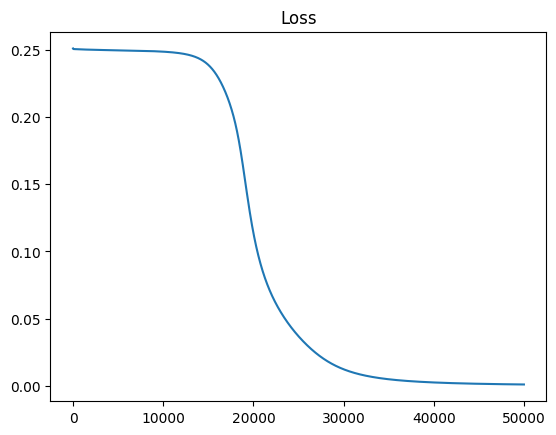

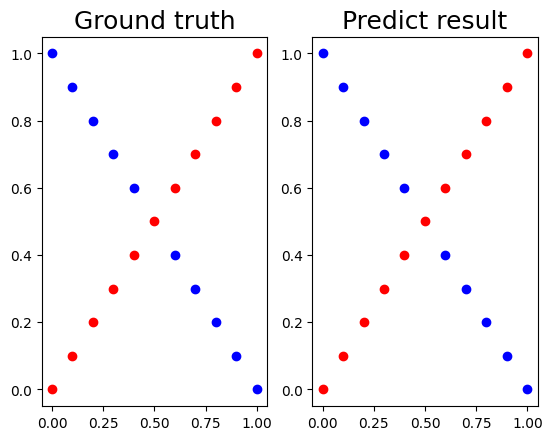

In [14]:
run(model=MLP, hiddens=[5, 5], lr=0.1, optimizer=SGD, activation=Sigmoid, epochs=50000, epochs_print=1000)

### hiddens = [2, 2], epochs = 20000

Parameters: 
- hidden layer size = [2, 2]
- learning rate = 0.1
- optimizer = SGD
- activation function = Sigmoid
- epochs = 20000

Results:
- Linear dataset: 100%
- XOR dataset: 71.43%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.25001942716512215
epoch  1000 loss : 0.24991623841543645
epoch  1500 loss : 0.24980222375040134
epoch  2000 loss : 0.24965952799379415
epoch  2500 loss : 0.24946368684731376
epoch  3000 loss : 0.2491759509095379
epoch  3500 loss : 0.24872758821523808
epoch  4000 loss : 0.2479830818166842
epoch  4500 loss : 0.24664270222312357
epoch  5000 loss : 0.2439534098499937
epoch  5500 loss : 0.2378084922307143
epoch  6000 loss : 0.22260467073299
epoch  6500 loss : 0.18898993001104333
epoch  7000 loss : 0.1382325185141236
epoch  7500 loss : 0.09475815314997252
epoch  8000 loss : 0.06826527065109961
epoch  8500 loss : 0.05298054766834464
epoch  9000 loss : 0.043653398378615045
epoch  9500 loss : 0.037491923936867504
epoch 10000 loss : 0.03313997725908599
epoch 10500 loss : 0.02990599564563258
epoch 11000 loss : 0.02740641757625546
epoch 11500 los

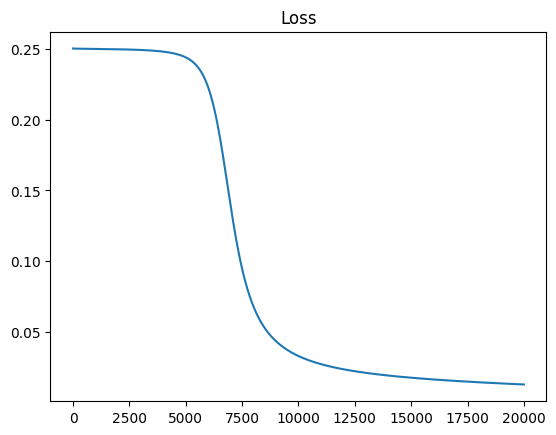

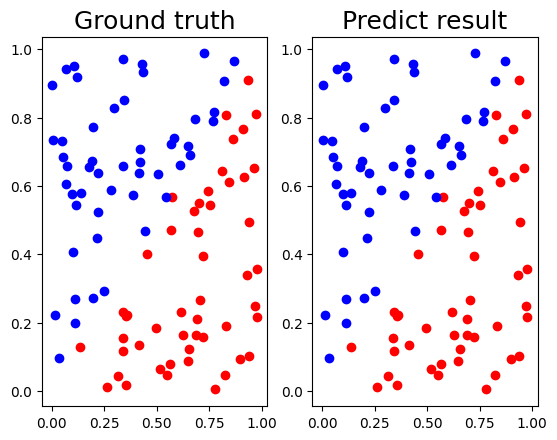

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.24891775342361497
epoch  1000 loss : 0.24879772539438716
epoch  1500 loss : 0.2486585606812414
epoch  2000 loss : 0.2484957171897756
epoch  2500 loss : 0.24830344089354536
epoch  3000 loss : 0.24807423189148006
epoch  3500 loss : 0.24779809230931737
epoch  4000 loss : 0.24746146464001986
epoch  4500 loss : 0.2470457305793677
epoch  5000 loss : 0.24652509598216932
epoch  5500 loss : 0.2458636658090557
epoch  6000 loss : 0.24501159537976064
epoch  6500 loss : 0.2439005960512705
epoch  7000 loss : 0.24244021163946972
epoch  7500 loss : 0.24051885354635016
epoch  8000 loss : 0.23801784625296368
epoch  8500 loss : 0.23484972442331653
epoch  9000 loss : 0.23102288676540886
epoch  9500 loss : 0.2267008595732871
epoch 10000 loss : 0.22219000227945043
epoch 10500 loss : 0.21782938398173324
epoch 11000 loss : 0.21386249787551773
epoch 11500 loss : 

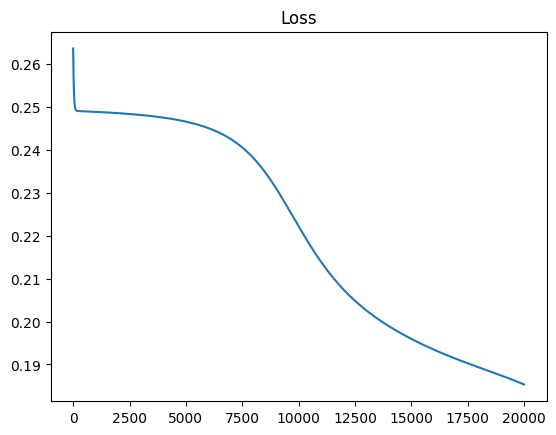

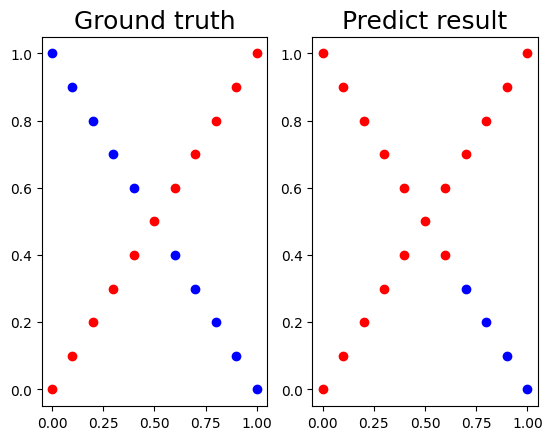

In [15]:
run(model=MLP, hiddens=[2, 2], lr=0.1, optimizer=SGD, activation=Sigmoid, epochs=20000, epochs_print=500)

### hiddens = [2, 2], epochs = 50000

Parameters: 
- hidden layer size = [2, 2]
- learning rate = 0.1
- optimizer = SGD
- activation function = Sigmoid
- epochs = 50000

Results:
- Linear dataset: 100%
- XOR dataset: 100%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch  1000 loss : 0.24991623841543645
epoch  2000 loss : 0.24965952799379415
epoch  3000 loss : 0.2491759509095379
epoch  4000 loss : 0.2479830818166842
epoch  5000 loss : 0.2439534098499937
epoch  6000 loss : 0.22260467073299
epoch  7000 loss : 0.1382325185141236
epoch  8000 loss : 0.06826527065109961
epoch  9000 loss : 0.043653398378615045
epoch 10000 loss : 0.03313997725908599
epoch 11000 loss : 0.02740641757625546
epoch 12000 loss : 0.023779038377219758
epoch 13000 loss : 0.0212438990105631
epoch 14000 loss : 0.019340001229134998
epoch 15000 loss : 0.017831745595466304
epoch 16000 loss : 0.016587965400725557
epoch 17000 loss : 0.015530551997047027
epoch 18000 loss : 0.01461037250256771
epoch 19000 loss : 0.013795081572554818
epoch 20000 loss : 0.013062552076806955
epoch 21000 loss : 0.012397140772180902
epoch 22000 loss : 0.011787466382725433
epoch 2

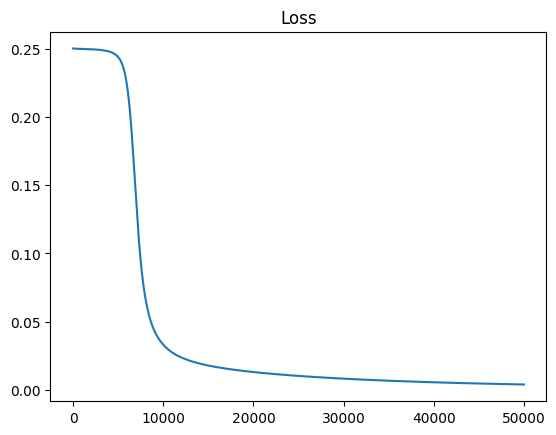

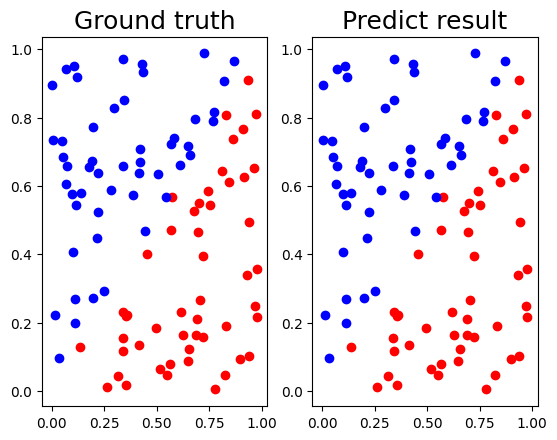

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch  1000 loss : 0.24879772539438716
epoch  2000 loss : 0.2484957171897756
epoch  3000 loss : 0.24807423189148006
epoch  4000 loss : 0.24746146464001986
epoch  5000 loss : 0.24652509598216932
epoch  6000 loss : 0.24501159537976064
epoch  7000 loss : 0.24244021163946972
epoch  8000 loss : 0.23801784625296368
epoch  9000 loss : 0.23102288676540886
epoch 10000 loss : 0.22219000227945043
epoch 11000 loss : 0.21386249787551773
epoch 12000 loss : 0.20739979681957146
epoch 13000 loss : 0.20260741643063926
epoch 14000 loss : 0.19892798794995561
epoch 15000 loss : 0.1959550013557989
epoch 16000 loss : 0.19345136323227424
epoch 17000 loss : 0.19127401645259487
epoch 18000 loss : 0.1893069964656413
epoch 19000 loss : 0.18740747959379914
epoch 20000 loss : 0.1853439334499074
epoch 21000 loss : 0.18271233838677473
epoch 22000 loss : 0.17874470104167645
epoch 23000 loss 

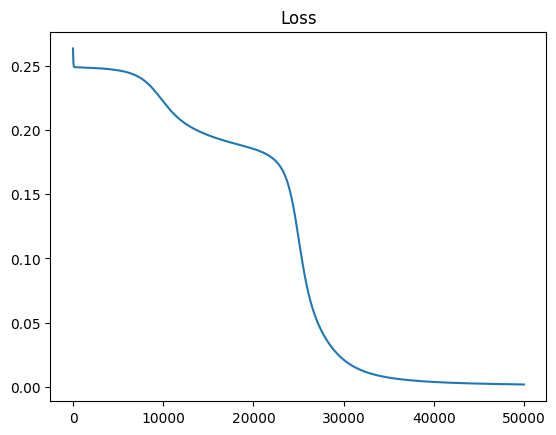

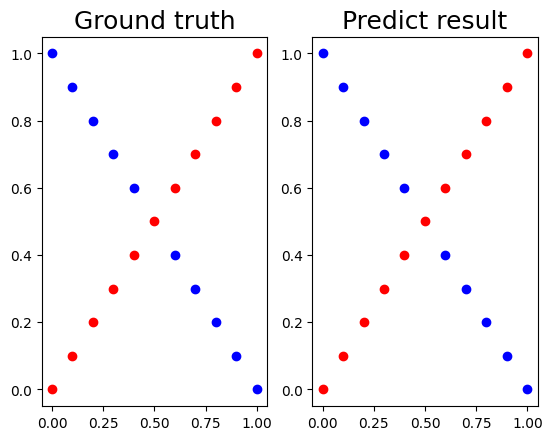

In [16]:
run(model=MLP, hiddens=[2, 2], lr=0.1, optimizer=SGD, activation=Sigmoid, epochs=50000, epochs_print=1000)

## Try without activation functions

Discoveries:
- 如果 hidden layer 的 size 太大，或者 learning rate 太大，會導致 loss 是 nan 。

### hiddens = [10, 10], lr = 0.01

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.01
- optimizer = SGD
- activation function = Sigmoid
- epochs = 10000

Results:
- Linear dataset: 99.00%
  - 收斂速度很快
- XOR dataset: 52.38%
  - 出現 predicition 是 nan 的情況，調低 learning rate 或增加 hidden layer size 會改善

Linear dataset: 

Layer1 : Affine
Layer2 : Affine
Layer3 : Affine

epoch   500 loss : 0.08375004096223274
epoch  1000 loss : 0.08375004096223276
epoch  1500 loss : 0.0837500409622328
epoch  2000 loss : 0.08375004096223275
epoch  2500 loss : 0.08375004096223276
epoch  3000 loss : 0.08375004096223274
epoch  3500 loss : 0.08375004096223274
epoch  4000 loss : 0.08375004096223274
epoch  4500 loss : 0.08375004096223274
epoch  5000 loss : 0.08375004096223274
epoch  5500 loss : 0.08375004096223274
epoch  6000 loss : 0.08375004096223274
epoch  6500 loss : 0.08375004096223274
epoch  7000 loss : 0.08375004096223274
epoch  7500 loss : 0.08375004096223274
epoch  8000 loss : 0.08375004096223274
epoch  8500 loss : 0.08375004096223274
epoch  9000 loss : 0.08375004096223274
epoch  9500 loss : 0.08375004096223274
epoch 10000 loss : 0.08375004096223274
Iter: 0 |	 Ground truth: [1] |	 Predict: [1]
Iter: 1 |	 Ground truth: [0] |	 Predict: [0]
Iter: 2 |	 Ground truth: [0] |	 Predict: [0]
Iter: 3 |	 Ground t

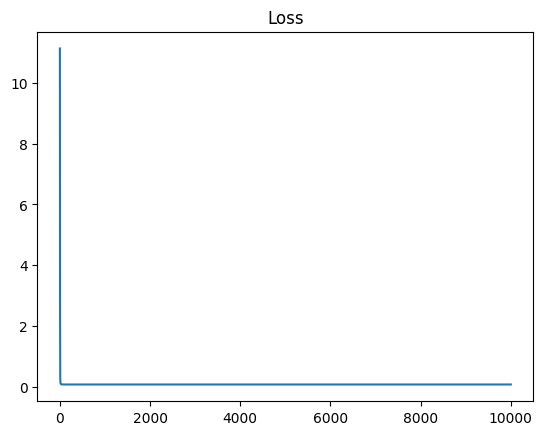

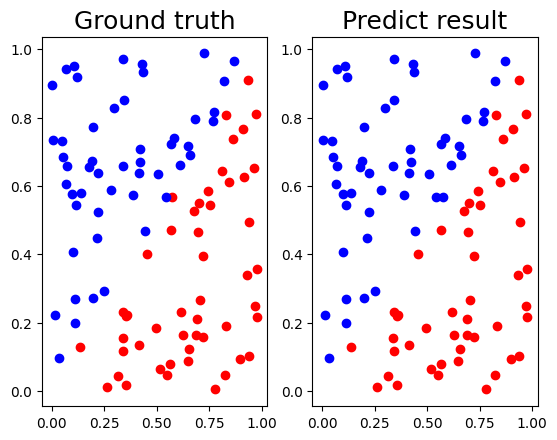

XOR dataset:

Layer1 : Affine
Layer2 : Affine
Layer3 : Affine

epoch   500 loss : nan
epoch  1000 loss : nan
epoch  1500 loss : nan
epoch  2000 loss : nan
epoch  2500 loss : nan
epoch  3000 loss : nan
epoch  3500 loss : nan
epoch  4000 loss : nan
epoch  4500 loss : nan
epoch  5000 loss : nan
epoch  5500 loss : nan
epoch  6000 loss : nan
epoch  6500 loss : nan
epoch  7000 loss : nan
epoch  7500 loss : nan
epoch  8000 loss : nan
epoch  8500 loss : nan
epoch  9000 loss : nan
epoch  9500 loss : nan
epoch 10000 loss : nan
Iter: 0 |	 Ground truth: [0] |	 Predict: [0]
Iter: 1 |	 Ground truth: [1] |	 Predict: [0]
Iter: 2 |	 Ground truth: [0] |	 Predict: [0]
Iter: 3 |	 Ground truth: [1] |	 Predict: [0]
Iter: 4 |	 Ground truth: [0] |	 Predict: [0]
Iter: 5 |	 Ground truth: [1] |	 Predict: [0]
Iter: 6 |	 Ground truth: [0] |	 Predict: [0]
Iter: 7 |	 Ground truth: [1] |	 Predict: [0]
Iter: 8 |	 Ground truth: [0] |	 Predict: [0]
Iter: 9 |	 Ground truth: [1] |	 Predict: [0]
Iter: 10 |	 Ground truth: [

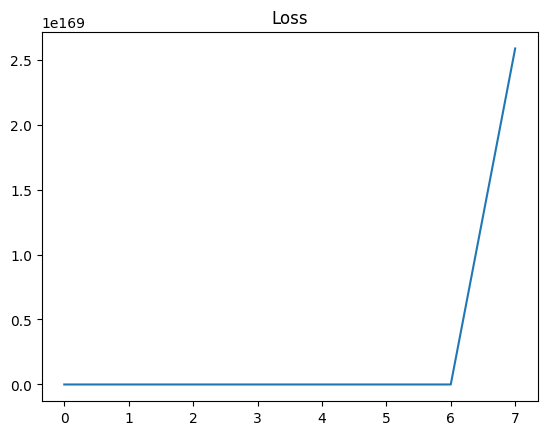

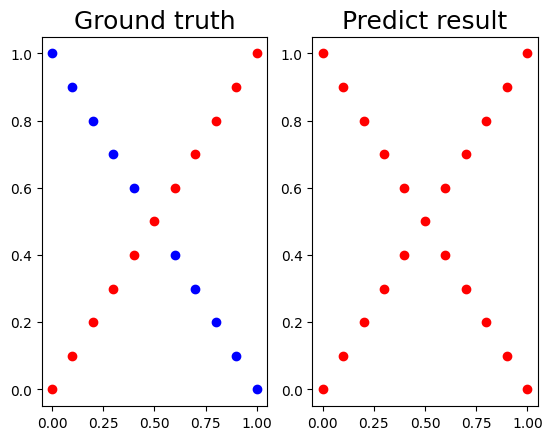

In [17]:
run(model=MLP_wo_activation, hiddens=[10, 10], lr=0.01, optimizer=SGD, activation=Sigmoid, epochs=10000, epochs_print=500)

### hiddens = [5, 5], lr = 0.01

Parameters: 
- hidden layer size = [5, 5]
- learning rate = 0.01
- optimizer = SGD
- activation function = Sigmoid
- epochs = 20000

Results:
- Linear dataset: 99.00%
- XOR dataset: 52.38%

Linear dataset: 

Layer1 : Affine
Layer2 : Affine
Layer3 : Affine

epoch   500 loss : 0.08375004096224613
epoch  1000 loss : 0.0837500409622328
epoch  1500 loss : 0.08375004096223272
epoch  2000 loss : 0.08375004096223274
epoch  2500 loss : 0.08375004096223276
epoch  3000 loss : 0.08375004096223285
epoch  3500 loss : 0.08375004096223276
epoch  4000 loss : 0.08375004096223279
epoch  4500 loss : 0.08375004096223279
epoch  5000 loss : 0.08375004096223279
epoch  5500 loss : 0.08375004096223279
epoch  6000 loss : 0.08375004096223279
epoch  6500 loss : 0.08375004096223279
epoch  7000 loss : 0.08375004096223279
epoch  7500 loss : 0.08375004096223279
epoch  8000 loss : 0.08375004096223279
epoch  8500 loss : 0.08375004096223279
epoch  9000 loss : 0.08375004096223279
epoch  9500 loss : 0.08375004096223279
epoch 10000 loss : 0.08375004096223279
epoch 10500 loss : 0.08375004096223279
epoch 11000 loss : 0.08375004096223279
epoch 11500 loss : 0.08375004096223279
epoch 12000 loss : 0.0837500409622327

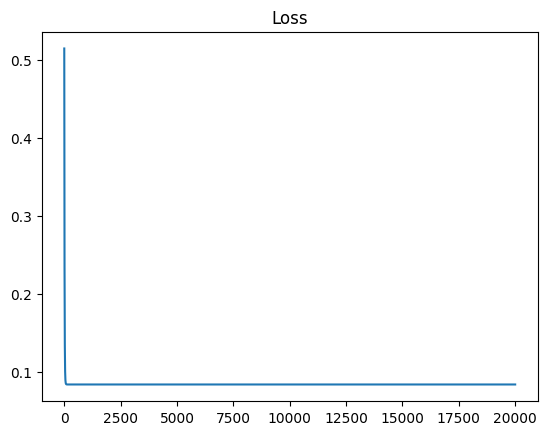

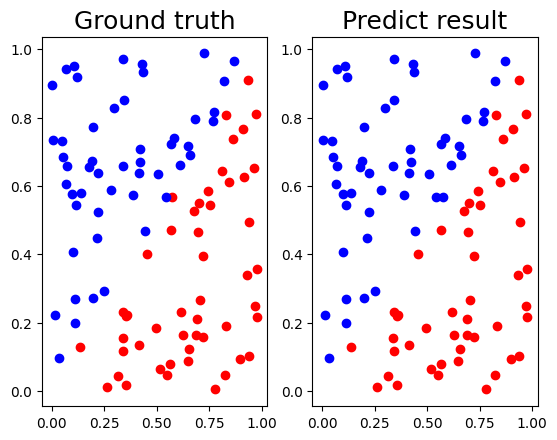

XOR dataset:

Layer1 : Affine
Layer2 : Affine
Layer3 : Affine

epoch   500 loss : 0.24943310720680073
epoch  1000 loss : 0.24943310657596368
epoch  1500 loss : 0.24943310657596376
epoch  2000 loss : 0.24943310657596363
epoch  2500 loss : 0.24943310657596368
epoch  3000 loss : 0.24943310657596368
epoch  3500 loss : 0.2494331065759637
epoch  4000 loss : 0.2494331065759637
epoch  4500 loss : 0.2494331065759637
epoch  5000 loss : 0.2494331065759637
epoch  5500 loss : 0.2494331065759637
epoch  6000 loss : 0.2494331065759637
epoch  6500 loss : 0.2494331065759637
epoch  7000 loss : 0.2494331065759637
epoch  7500 loss : 0.2494331065759637
epoch  8000 loss : 0.2494331065759637
epoch  8500 loss : 0.2494331065759637
epoch  9000 loss : 0.2494331065759637
epoch  9500 loss : 0.2494331065759637
epoch 10000 loss : 0.2494331065759637
epoch 10500 loss : 0.2494331065759637
epoch 11000 loss : 0.2494331065759637
epoch 11500 loss : 0.2494331065759637
epoch 12000 loss : 0.2494331065759637
epoch 12500 loss : 

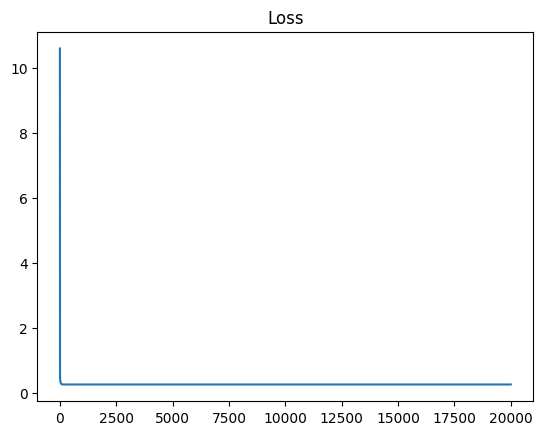

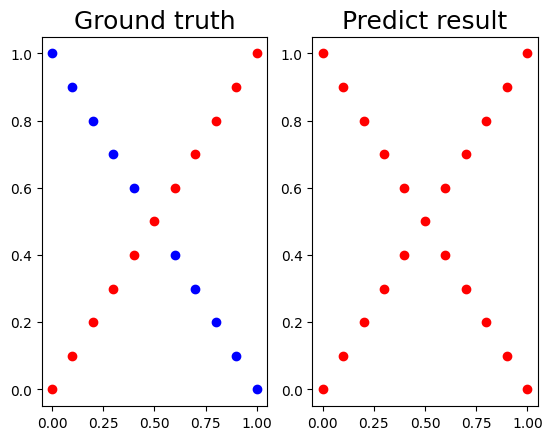

In [18]:
run(model=MLP_wo_activation, hiddens=[5, 5], lr=0.01, optimizer=SGD, activation=Sigmoid, epochs=20000, epochs_print=500)

# Extra

## Implement different optimizers

### AdaGrad, lr = 0.1

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.1
- optimizer = AdaGrad
- activation function = Sigmoid
- epochs = 10000

Results:
- Linear dataset: 100%
- XOR dataset: 100%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.01152375764871345
epoch  1000 loss : 0.006145857682055718
epoch  1500 loss : 0.003818634596942996
epoch  2000 loss : 0.0026217656525466286
epoch  2500 loss : 0.0019211688302127044
epoch  3000 loss : 0.0014734192633104853
epoch  3500 loss : 0.0011696458748690912
epoch  4000 loss : 0.0009541215841602582
epoch  4500 loss : 0.0007956323770174048
epoch  5000 loss : 0.0006755816680923525
epoch  5500 loss : 0.000582355959156792
epoch  6000 loss : 0.000508415596926165
epoch  6500 loss : 0.00044870014610469964
epoch  7000 loss : 0.0003997132148812712
epoch  7500 loss : 0.0003589766870103033
epoch  8000 loss : 0.0003246941786994582
epoch  8500 loss : 0.0002955372382314735
epoch  9000 loss : 0.0002705058382913517
epoch  9500 loss : 0.00024883512051007516
epoch 10000 loss : 0.0002299316812436144
Iter: 0 |	 Ground truth: [1] |	 Predict: [1]
Iter: 

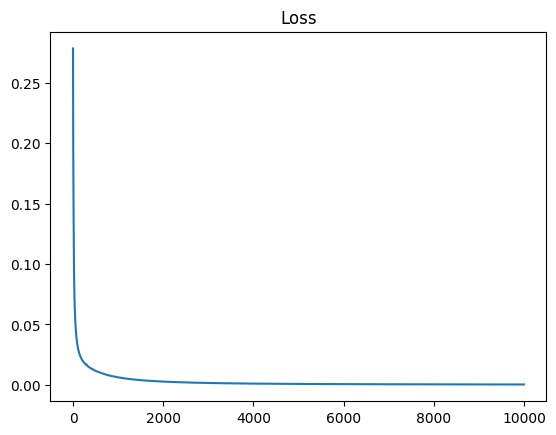

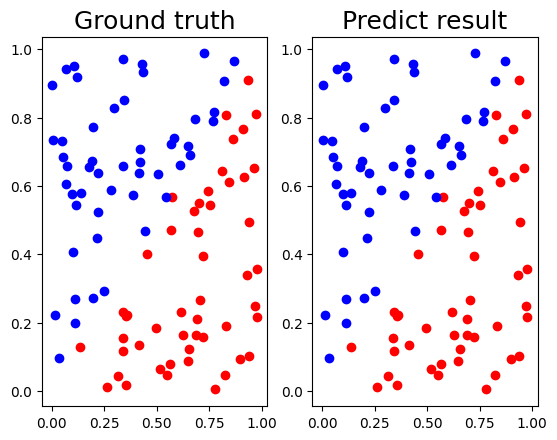

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.002945471252598785
epoch  1000 loss : 0.0008067809726748207
epoch  1500 loss : 0.0004379532181712419
epoch  2000 loss : 0.0002950158646599733
epoch  2500 loss : 0.00022062645945823182
epoch  3000 loss : 0.00017543585618546578
epoch  3500 loss : 0.00014523027438895575
epoch  4000 loss : 0.0001236859821538971
epoch  4500 loss : 0.0001075797068066308
epoch  5000 loss : 9.510243480504733e-05
epoch  5500 loss : 8.516312060685e-05
epoch  6000 loss : 7.706589724193268e-05
epoch  6500 loss : 7.034664029148561e-05
epoch  7000 loss : 6.468424755887586e-05
epoch  7500 loss : 5.984967858871542e-05
epoch  8000 loss : 5.567528079831025e-05
epoch  8500 loss : 5.2035583817977536e-05
epoch  9000 loss : 4.883486223536554e-05
epoch  9500 loss : 4.5998843294166345e-05
epoch 10000 loss : 4.3469035620991616e-05
Iter: 0 |	 Ground truth: [0] |	 Predict: [0]
Iter

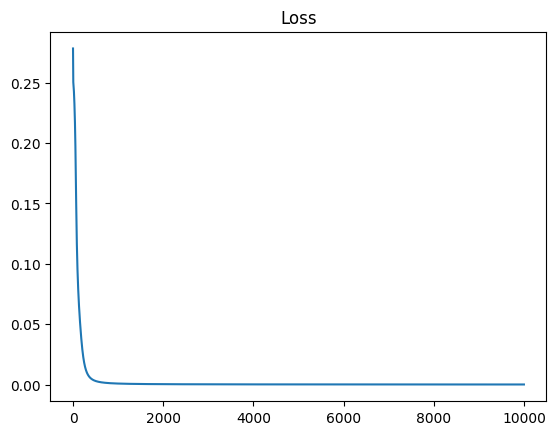

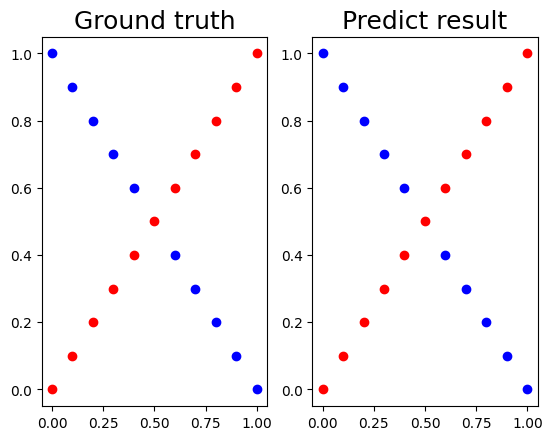

In [19]:
run(model=MLP, hiddens=[10, 10], lr=0.1, optimizer=AdaGrad, activation=Sigmoid, epochs=10000, epochs_print=500)

### AdaGrad, lr = 0.01

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.01
- optimizer = AdaGrad
- activation function = Sigmoid
- epochs = 10000

Results:
- Linear dataset: 99%
- XOR dataset: 100%

Linear dataset: 

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.10671260102743661
epoch  1000 loss : 0.07269896073531931
epoch  1500 loss : 0.057171343373822736
epoch  2000 loss : 0.04797212612305644
epoch  2500 loss : 0.041791625247744255
epoch  3000 loss : 0.037325088671130276
epoch  3500 loss : 0.03393699833701988
epoch  4000 loss : 0.031274538652692814
epoch  4500 loss : 0.02912392271841723
epoch  5000 loss : 0.027347290436984025
epoch  5500 loss : 0.025851534756453614
epoch  6000 loss : 0.024571495404972797
epoch  6500 loss : 0.023460265566685425
epoch  7000 loss : 0.022483293445348787
epoch  7500 loss : 0.021614634586294864
epoch  8000 loss : 0.020834485309851658
epoch  8500 loss : 0.02012751146050655
epoch  9000 loss : 0.01948168824515417
epoch  9500 loss : 0.018887478170865727
epoch 10000 loss : 0.018337238186172052
Iter: 0 |	 Ground truth: [1] |	 Predict: [1]
Iter: 1 |	 Ground truth: [0] 

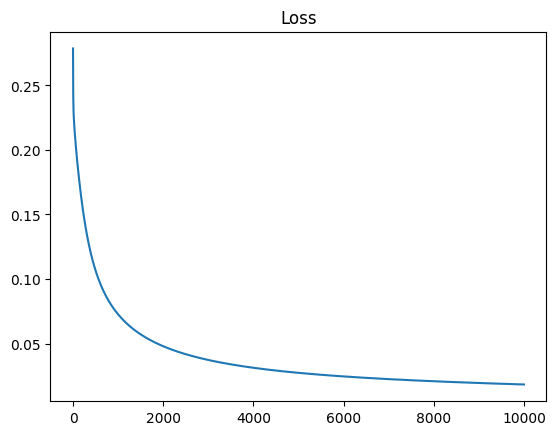

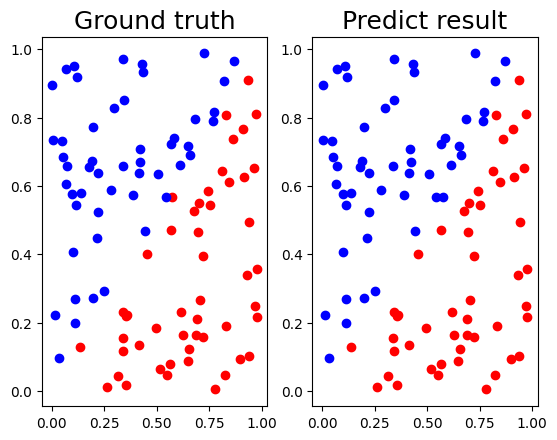

XOR dataset:

Layer1 : Affine
Activation1 : Sigmoid
Layer2 : Affine
Activation2 : Sigmoid
Layer3 : Affine
Activation3 : Sigmoid

epoch   500 loss : 0.24517990702575446
epoch  1000 loss : 0.23423869157090124
epoch  1500 loss : 0.2157989272025383
epoch  2000 loss : 0.1904392830623482
epoch  2500 loss : 0.1634948267691022
epoch  3000 loss : 0.1392912114482192
epoch  3500 loss : 0.11952197064037147
epoch  4000 loss : 0.10391747963380318
epoch  4500 loss : 0.09156655324909305
epoch  5000 loss : 0.08156145004060017
epoch  5500 loss : 0.07312893492948089
epoch  6000 loss : 0.06572845849421557
epoch  6500 loss : 0.05930126313301718
epoch  7000 loss : 0.05383196033905509
epoch  7500 loss : 0.049135219742992176
epoch  8000 loss : 0.04503869465998461
epoch  8500 loss : 0.04141387597235426
epoch  9000 loss : 0.03816584651434479
epoch  9500 loss : 0.03522497339827786
epoch 10000 loss : 0.032540723859086185
Iter: 0 |	 Ground truth: [0] |	 Predict: [0]
Iter: 1 |	 Ground truth: [1] |	 Predict: [1]
Ite

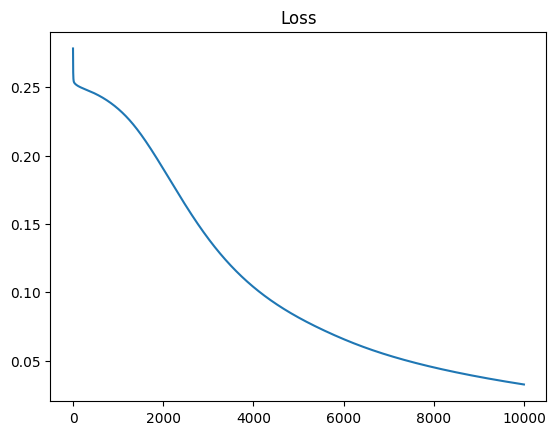

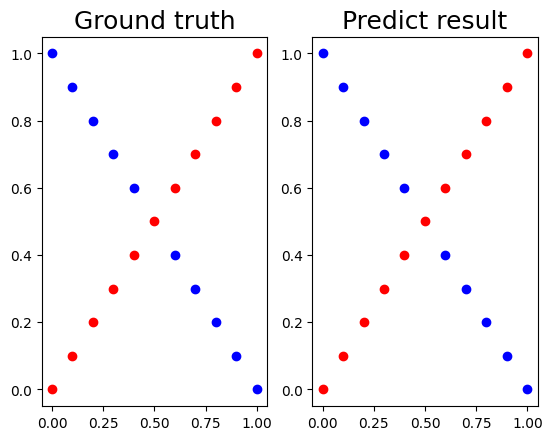

In [20]:
run(model=MLP, hiddens=[10, 10], lr=0.01, optimizer=AdaGrad, activation=Sigmoid, epochs=10000, epochs_print=500)

## Implement different activation functions

### ReLU

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.01
- optimizer = SGD
- activation function = ReLU
- epochs = 10000

Results:
- Linear dataset: 100%
- XOR dataset: 100%

Linear dataset: 

Layer1 : Affine
Activation1 : ReLU
Layer2 : Affine
Activation2 : ReLU
Layer3 : Affine
Activation3 : ReLU

epoch   500 loss : 0.027898522025809013
epoch  1000 loss : 0.021999870452870933
epoch  1500 loss : 0.018930884604556705
epoch  2000 loss : 0.016973779739117116
epoch  2500 loss : 0.015662794021459984
epoch  3000 loss : 0.014649613159212949
epoch  3500 loss : 0.01381359157079831
epoch  4000 loss : 0.013080002404941423
epoch  4500 loss : 0.012412393159824982
epoch  5000 loss : 0.011792338915793123
epoch  5500 loss : 0.01121962490584052
epoch  6000 loss : 0.010684436436112004
epoch  6500 loss : 0.010187006341570022
epoch  7000 loss : 0.00972502674078292
epoch  7500 loss : 0.00930268144252578
epoch  8000 loss : 0.008914914674109297
epoch  8500 loss : 0.008545886083124465
epoch  9000 loss : 0.008190377190392097
epoch  9500 loss : 0.00784868363545026
epoch 10000 loss : 0.007521317129197072
Iter: 0 |	 Ground truth: [1] |	 Predict: [1]
Iter: 1 |	 Ground truth: [0] |	 Pred

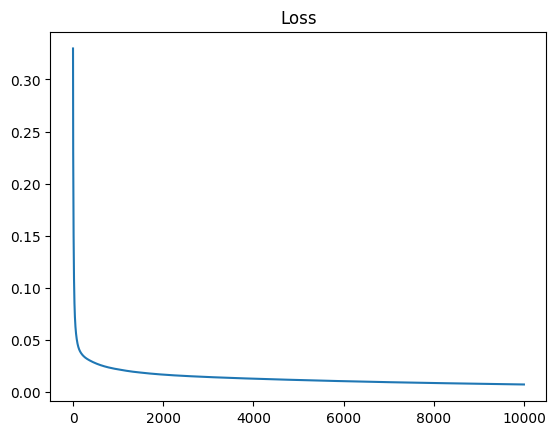

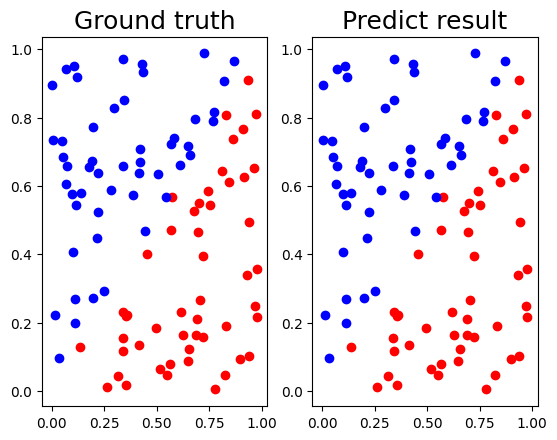

XOR dataset:

Layer1 : Affine
Activation1 : ReLU
Layer2 : Affine
Activation2 : ReLU
Layer3 : Affine
Activation3 : ReLU

epoch   500 loss : 0.06624369763962847
epoch  1000 loss : 0.05053326870022973
epoch  1500 loss : 0.04339062990765902
epoch  2000 loss : 0.03737330411135266
epoch  2500 loss : 0.02997459281395707
epoch  3000 loss : 0.026125592358204996
epoch  3500 loss : 0.022843397291991113
epoch  4000 loss : 0.01991751680254103
epoch  4500 loss : 0.017372011847732415
epoch  5000 loss : 0.015070112653404764
epoch  5500 loss : 0.01322987998775417
epoch  6000 loss : 0.011635603729055843
epoch  6500 loss : 0.010196462698746536
epoch  7000 loss : 0.008945156906563216
epoch  7500 loss : 0.007830247609134547
epoch  8000 loss : 0.0068512267943622385
epoch  8500 loss : 0.0059765258406251865
epoch  9000 loss : 0.005235354443563887
epoch  9500 loss : 0.004559432220199681
epoch 10000 loss : 0.0039300542573789425
Iter: 0 |	 Ground truth: [0] |	 Predict: [0]
Iter: 1 |	 Ground truth: [1] |	 Predict

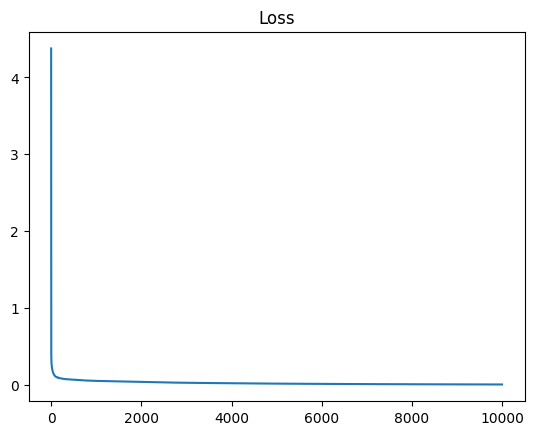

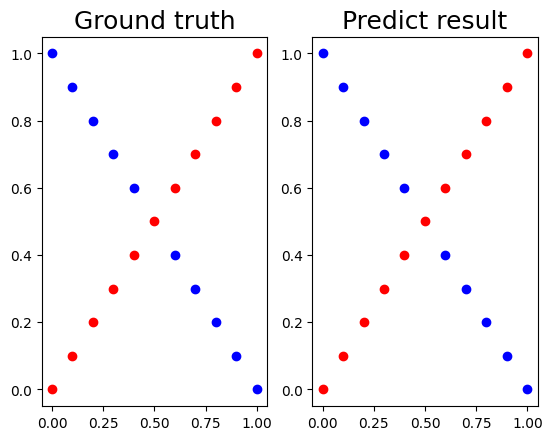

In [21]:
run(model=MLP, hiddens=[10, 10], lr=0.01, optimizer=SGD, activation=ReLU, epochs=10000, epochs_print=500)

### Tanh

Parameters: 
- hidden layer size = [10, 10]
- learning rate = 0.01
- optimizer = SGD
- activation function = ReLU
- epochs = 10000

Results:
- Linear dataset: 98%
- XOR dataset: 100%

Linear dataset: 

Layer1 : Affine
Activation1 : Tanh
Layer2 : Affine
Activation2 : Tanh
Layer3 : Affine
Activation3 : Tanh

epoch   500 loss : 0.06153779909521981
epoch  1000 loss : 0.046434218257384814
epoch  1500 loss : 0.039649884920667795
epoch  2000 loss : 0.03617800733316717
epoch  2500 loss : 0.03399846761541849
epoch  3000 loss : 0.03236425101436815
epoch  3500 loss : 0.03101547303589215
epoch  4000 loss : 0.029848121345541222
epoch  4500 loss : 0.028808701342138355
epoch  5000 loss : 0.02786385072928842
epoch  5500 loss : 0.026990712087648947
epoch  6000 loss : 0.026173047465412835
epoch  6500 loss : 0.025399208123377644
epoch  7000 loss : 0.024660880566371585
epoch  7500 loss : 0.0239522494355595
epoch  8000 loss : 0.0232694141325941
epoch  8500 loss : 0.022609961831318814
epoch  9000 loss : 0.021972633238831932
epoch  9500 loss : 0.021357041301630117
epoch 10000 loss : 0.020763421079954436
Iter: 0 |	 Ground truth: [1] |	 Predict: [1]
Iter: 1 |	 Ground truth: [0] |	 Predict: 

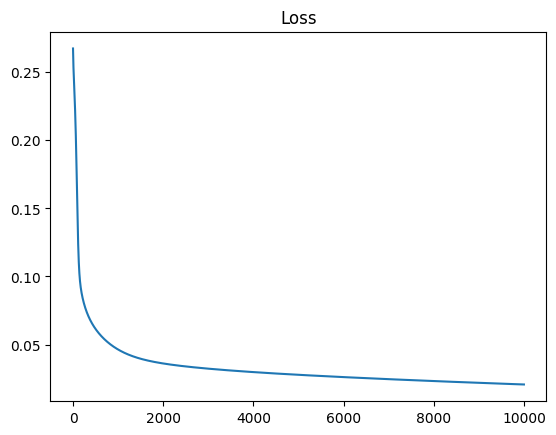

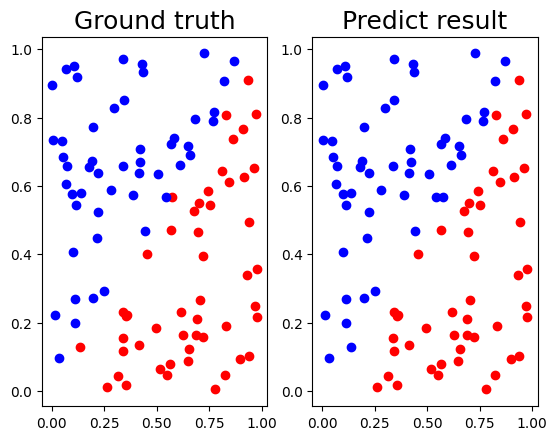

XOR dataset:

Layer1 : Affine
Activation1 : Tanh
Layer2 : Affine
Activation2 : Tanh
Layer3 : Affine
Activation3 : Tanh

epoch   500 loss : 0.14270014985539495
epoch  1000 loss : 0.06620559479198616
epoch  1500 loss : 0.051116760929783976
epoch  2000 loss : 0.04443452991049367
epoch  2500 loss : 0.03934156253371025
epoch  3000 loss : 0.03487063084824987
epoch  3500 loss : 0.03080581245329414
epoch  4000 loss : 0.027056984853639127
epoch  4500 loss : 0.023587253231540848
epoch  5000 loss : 0.02039127437578103
epoch  5500 loss : 0.017482142560373556
epoch  6000 loss : 0.01488006027107256
epoch  6500 loss : 0.01260123264670264
epoch  7000 loss : 0.010648608833929846
epoch  7500 loss : 0.009007693176405481
epoch  8000 loss : 0.007648800160704733
epoch  8500 loss : 0.006533484093412801
epoch  9000 loss : 0.005621350332643676
epoch  9500 loss : 0.004874826558125773
epoch 10000 loss : 0.004261490759464046
Iter: 0 |	 Ground truth: [0] |	 Predict: [0]
Iter: 1 |	 Ground truth: [1] |	 Predict: [1]

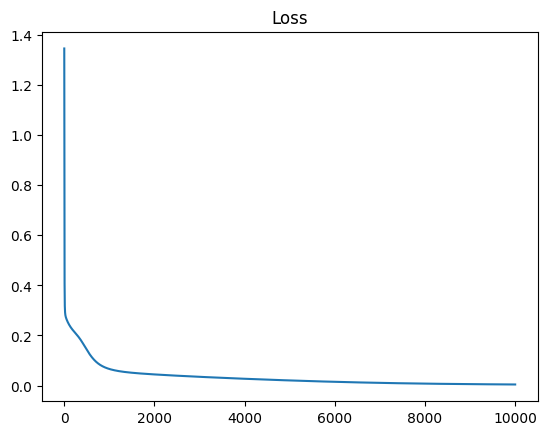

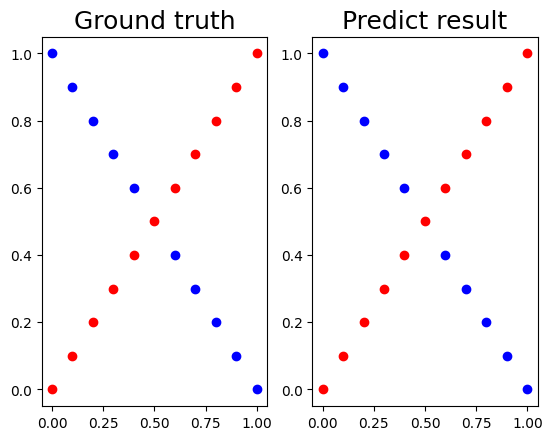

In [22]:
run(model=MLP, hiddens=[10, 10], lr=0.01, activation=Tanh, epochs=10000, epochs_print=500)